In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Que 3


Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ(or ϵ-neighborhood) from the minimum value of the loss function.Visualize the convergence process for 15 epochs. Choose ϵ=0.001for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods. 

### Which Optimization process takes larger number of epochs to converge and why ?? 


In full-batch gradient descent, a single large step is taken after accurately calculating the net gradient for all parameters across the entire dataset. In mini-batch gradient descent, steps are taken for smaller batches of the dataset, allowing for more frequent updates. In contrast, in stochastic gradient descent (SGD), the gradient is updated after every iteration, based on individual data points. Although the step size in SGD is small, the number of updates (or steps) per epoch is significantly higher, leading to more frequent updates. Consequently, the total number of epochs required for convergence tends to be the lowest in SGD, as the parameters are continuously updated throughout the process and they converges towards the minima.


In Stochastic Gradient Descent (SGD), the model is updated one sample at a time, resulting in **n** small steps per epoch, where **n** is the total number of samples in the dataset. In contrast, full-batch gradient descent updates the model using all **n** samples at once, so there is only **one large step** per epoch. Mini-batch gradient descent strikes a balance by dividing the dataset into batches of size **b**, updating the model using **b** samples at a time, which results in **n/b** steps per epoch. Here, **b** represents the batch size.


**Full Batch** will take the maximum number of epochs to reach the convergence because it take one single large step over the whole dataset. So number of updates are same as the number of epochs.



## Full Batch

In [13]:
import numpy as np

def gradient_full_batch(X, y, epochs, theta, theta_ols, alpha=0.001, thresh=0.001):
    # N is number of features in X and d is the number of samples 

    N = X.shape[1]
    d = X.shape[0]

    params = []

    
    y_pred = X @ theta

    J_theta = float('inf')

    losses = []
    iters = 0
    e = 0
    for epoch in range(1, epochs+1):
        e = epoch
        if np.sqrt(np.sum((theta - theta_ols)**2)) < thresh:
            params.append(theta.copy())  # Append a copy of theta
            losses.append(J_theta)
            return params, losses, iters, e
        

        params.append(theta.copy())  # Append a copy of theta
        losses.append(J_theta)

        if J_theta > thresh:
            iters += 1

        y_pred = X @ theta

        gradient = (1 / d) * (X.T @ (y_pred - y))
        
        theta -= alpha * gradient
    
        J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    
    return params, losses, iters, e


## Mini Batch

In [3]:
# def create_batches(X,y,num_batches):
#     batch_size = X.shape[0] // num_batches
#     indices = np.random.permutation(X.shape[0])
#     X_shuffled = X[indices]
#     y_shuffled = y[indices]

#     mini_batches = []
#     for i in range(0,X.shape[0],batch_size):
#         mini_batches.append((X_shuffled[i:i+batch_size],y_shuffled[i:i+batch_size]))

#     return mini_batches


def create_batches(X, y, num_batches):
    indices = np.random.permutation(X.shape[0])
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    batch_size = X.shape[0]//num_batches
    
    X_batches = np.array_split(X_shuffled[:num_batches * batch_size], num_batches)
    y_batches = np.array_split(y_shuffled[:num_batches * batch_size], num_batches)
    
    if X.shape[0] % batch_size != 0:
        X_batches.append(X_shuffled[num_batches * batch_size:])
        y_batches.append(y_shuffled[num_batches * batch_size:])
    
    mini_batches = list(zip(X_batches, y_batches))
    
    return mini_batches

In [14]:
def gradient_mini_batch(X,  y, num_batch, epochs, theta, theta_ols ,alpha = 0.001, thresh = 0.001):
    # N is number of features in X and d is the number of samples 

    N = X.shape[1]
    d = X.shape[0]

    params = []

    losses = []
    iters = 0
    J_theta = float('inf')
    e = 0

    for epoch in range(1,epochs):
        e = epoch
        params.append(theta.copy())  # Append a copy of theta
        losses.append(J_theta)

        if np.sqrt(np.sum((theta - theta_ols)**2)) < thresh:
            return params, losses, iters, e

        batches = create_batches(X,y,num_batch)
        for batch in batches: 
            iters+=1              
            x_b = batch[0]
            y_b = batch[1]

            y_hat_b = x_b @ theta
            gradient = (1 / x_b.shape[0]) * (x_b.T @ (y_hat_b - y_b))
            theta -= alpha * gradient


        J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    
    return params, losses , iters, e

        

## Stochastic 

In [15]:
def gradient_SGD(X, y, epochs,  theta, theta_ols ,alpha=0.001,thresh = 0.001):
    N = X.shape[1]  # Number of features
    d = X.shape[0]  # Number of samples

    params = []

    losses = []
    iters = 0

    J_theta = float('inf')
    e = 0

    for epoch in range(1,epochs):
        e = epoch
        params.append(theta.copy())  # Append a copy of theta
        losses.append(J_theta)
        for i in range(d):

            if J_theta > thresh:
                iters += 1


            if np.sqrt(np.sum((theta - theta_ols)**2)) < thresh:
                return params, losses, iters, e

            x_i = X[i:i+1]
            y_i = y[i:i+1]
            
            y_hat_i = x_i @ theta
            
            gradient = (x_i.T @ (y_hat_i - y_i))
            
            theta -= alpha * gradient

            J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    return params, losses, iters, e

## Comparison

In [6]:
def make_data(noise=0.3, degree=1, num_samples=100, random_state=42):
    # Set the random seed for reproducibility
    if random_state:
        np.random.seed(random_state)


    # Create X 
    X = np.linspace(-1, 1, num_samples)
    
    # Initialize the coefficients
    coeffs = np.random.randn(degree + 1)
    
    # Calculate the 
    y = np.polyval(coeffs, X)
    
    y += np.random.normal(scale=noise, size=y.shape)
    
    X = X.reshape(-1, 1)
    
    return X, y


In [7]:
# prepare the data using make data function
X, y = make_data(noise=0.1 , degree=1, num_samples=1000, random_state=42)

# Concatenate the rows of ones to the data
X = np.concatenate([np.ones((X.shape[0],1)),X],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

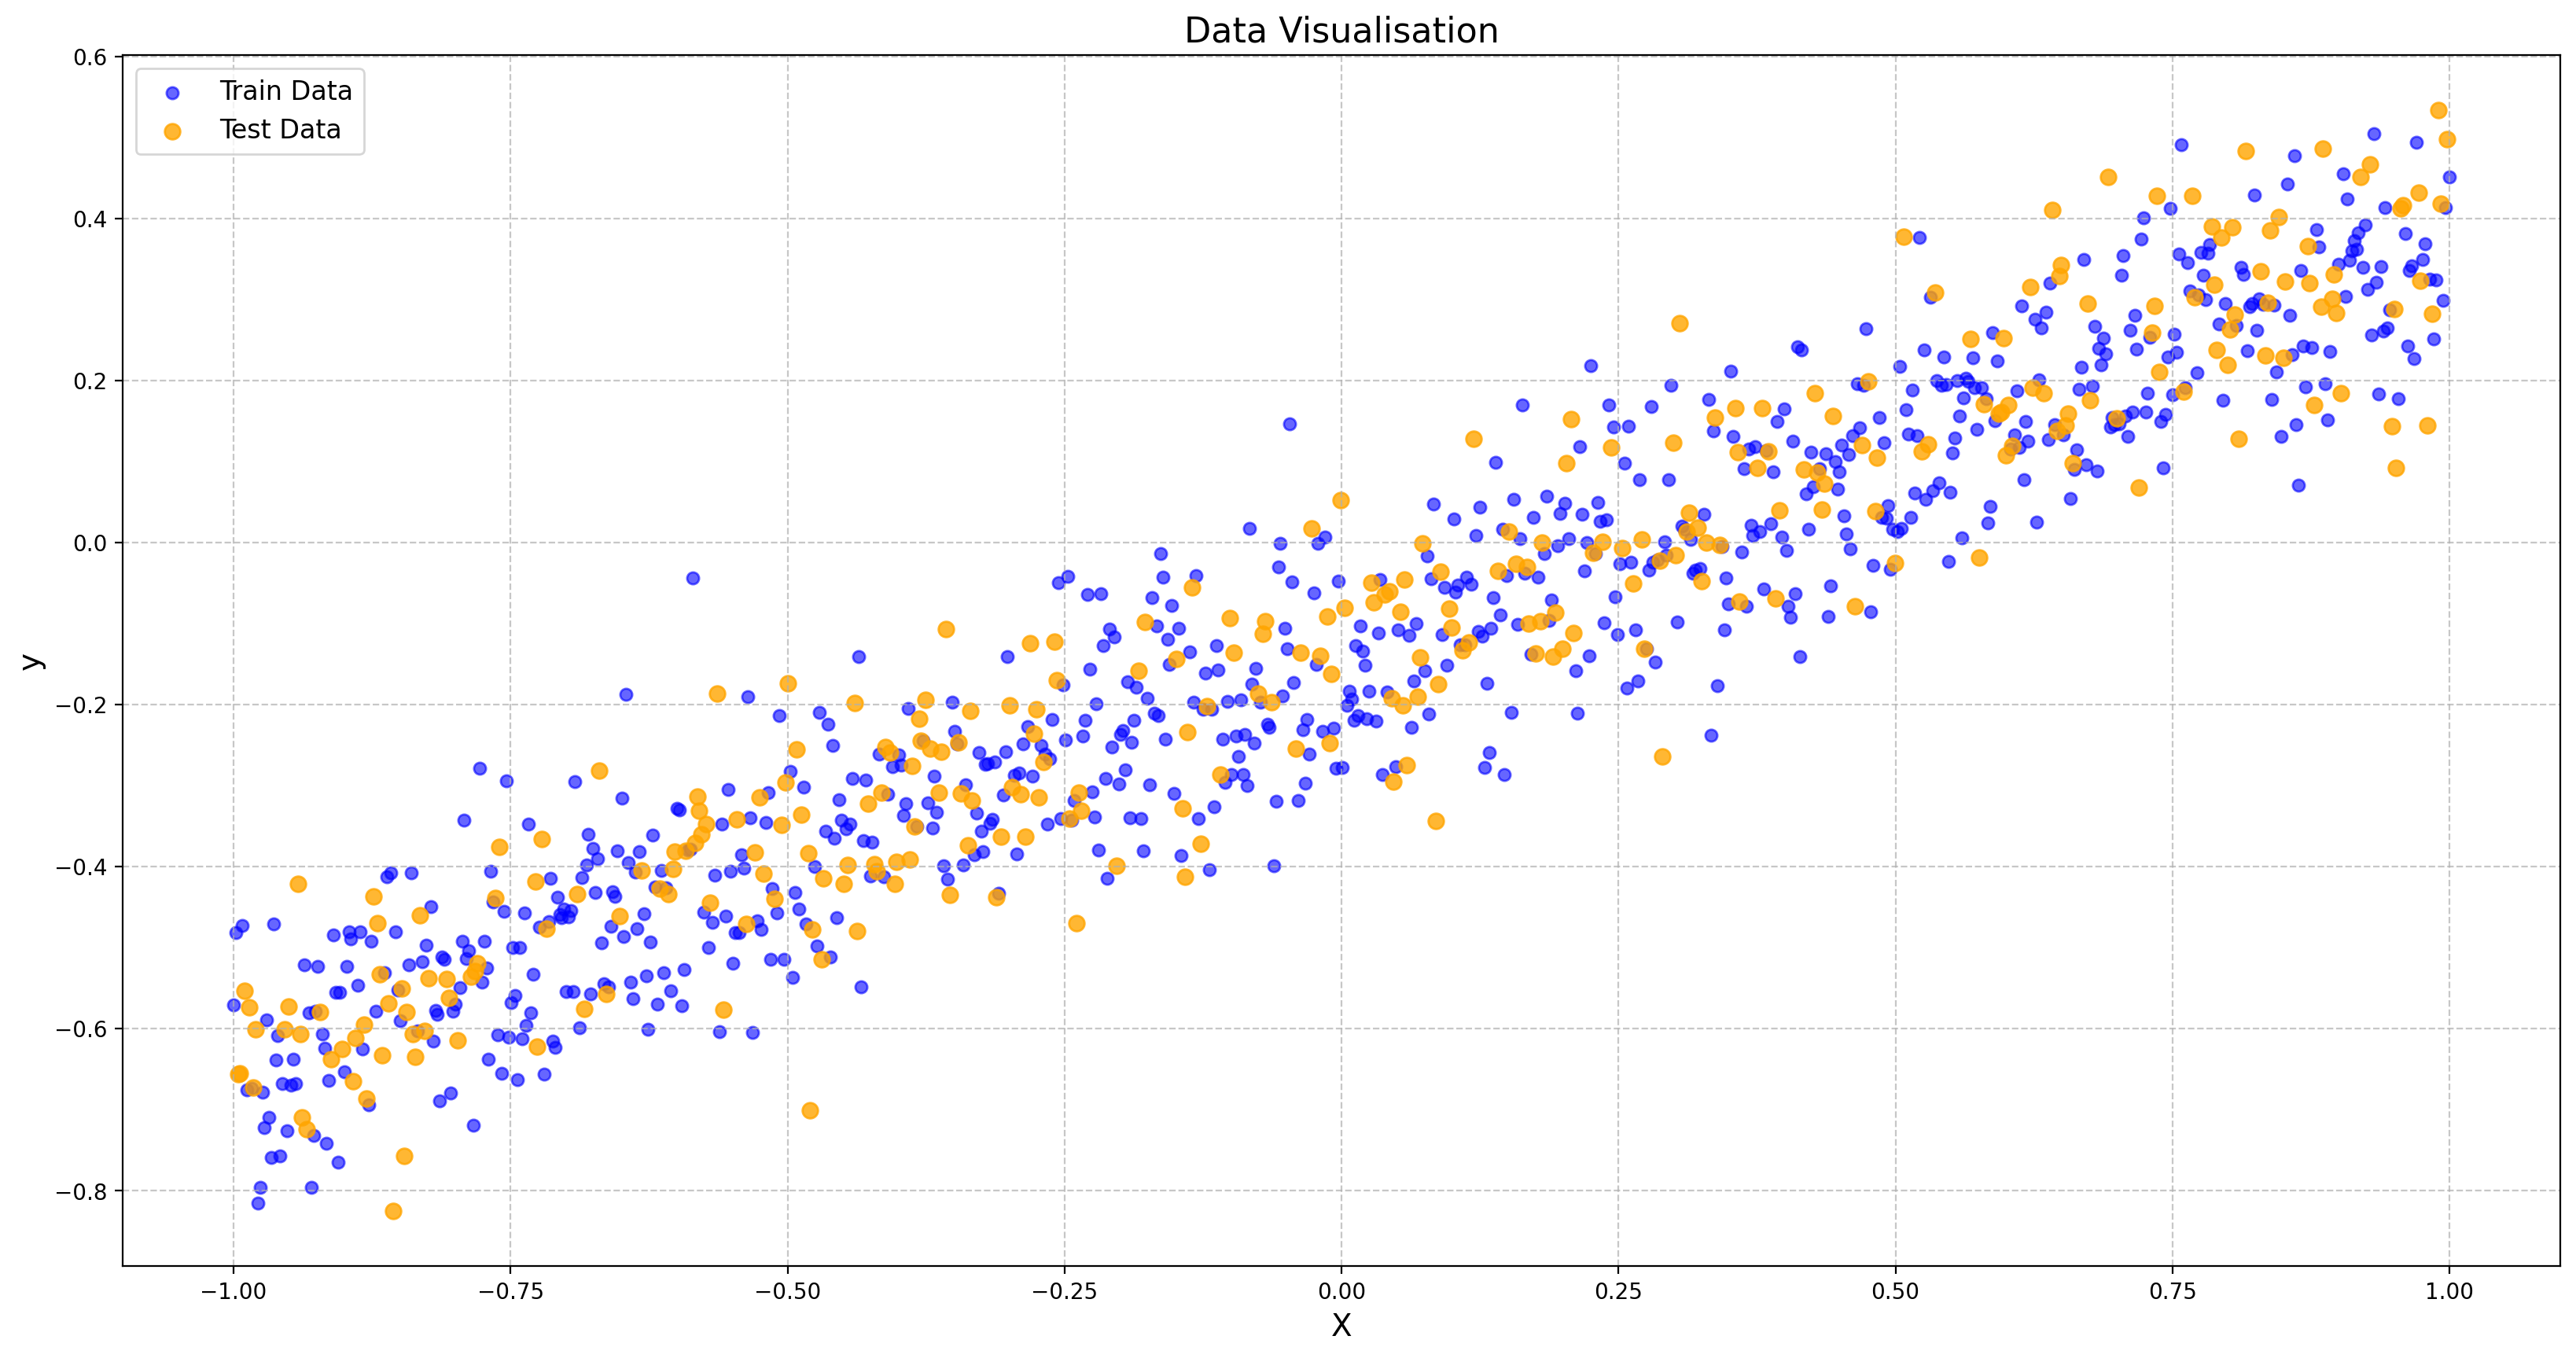

In [8]:
plt.figure(figsize=(20, 10))
plt.scatter(X_train[:, 1], y_train, s=30, label="Train Data", color='blue', alpha=0.6)
plt.scatter(X_test[:, 1], y_test, s=50, label="Test Data", color='orange', alpha=0.8)
plt.title("Data Visualisation", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [19]:
full_batch_iter = 0
full_batch_epoch = 0
mini_batch_iter = 0
mini_batch_epoch = 0
sgd_iter = 0
sgd_epoch = 0


for i in range(10):
    epochs = 50000
    epsilon = 0.001

    # Optimal theta from Ordinary Least Squares (OLS)
    theta_ols = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    # Initialize theta randomly based on the number of features
    theta = np.random.randn(X_train.shape[1])

    num_batch = 20

    # Run full batch gradient descent
    full_grad_thetas, full_grad_losses, full_grad_iters, full_grad_epoch = gradient_full_batch(
        X_train, y_train, epochs, np.copy(theta), theta_ols, alpha=0.001, thresh=epsilon
    )
    full_batch_iter += full_grad_iters
    full_batch_epoch += full_grad_epoch

    # Run mini-batch gradient descent
    mini_grad_thetas, mini_grad_losses, mini_grad_iters, mini_grad_epoch = gradient_mini_batch(
        X_train, y_train, num_batch, epochs, np.copy(theta), theta_ols, alpha=0.001, thresh=epsilon
    )
    mini_batch_iter += mini_grad_iters
    mini_batch_epoch += mini_grad_epoch

    # Run Stochastic Gradient Descent (SGD)
    sgd_grad_thetas, sgd_grad_losses, sgd_grad_iters, sgd_grad_epoch = gradient_SGD(
        X_train, y_train, epochs, np.copy(theta), theta_ols, alpha=0.001, thresh=epsilon
    )
    sgd_iter += sgd_grad_iters
    sgd_epoch += sgd_grad_epoch
    

print("Full Gradient:")
print("Average Iterations:", full_batch_iter//10)
print("Average Iterations:", full_batch_epoch//10)
print("Final theta:", full_grad_thetas[-1])

print("\nMini-batch Gradient:")
print("Average Iterations:", mini_batch_iter//10)
print("Average Iterations:", mini_batch_epoch//10)
print("Final theta:", mini_grad_thetas[-1])

print("\nStochastic Gradient Descent:")
print("Average Iterations:", sgd_iter//10)
print("Average Iterations:", sgd_epoch//10)
print("Final theta:", sgd_grad_thetas[-1])



Full Gradient:
Average Iterations: 19145
Average Iterations: 19146
Final theta: [-0.13948637  0.50087255]

Mini-batch Gradient:
Average Iterations: 19158
Average Iterations: 958
Final theta: [-0.13948705  0.50086697]

Stochastic Gradient Descent:
Average Iterations: 17654
Average Iterations: 25
Final theta: [-0.13904621  0.50107967]


In [20]:


def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost


def plot_contours(thetas_arr, X, y, limit=None):
    # Convert thetas_arr to a NumPy array if it isn't already
    thetas_arr = np.array(thetas_arr)
    
    # Calculate the min and max for theta0 and theta1 from the thetas array
    theta0_min, theta0_max = -1 * np.max(np.abs(thetas_arr[:, 0])), np.max(np.abs(thetas_arr[:, 0]))
    theta1_min, theta1_max = -1 * np.max(np.abs(thetas_arr[:, 1])), np.max(np.abs(thetas_arr[:, 1]))

    theta0_vals = np.linspace(theta0_min, theta0_max, 100)
    theta1_vals = np.linspace(theta1_min, theta1_max, 100)

    # Determine how many plots to create
    total_plots = 15
    indices = np.linspace(0, len(thetas_arr) - 1, total_plots, dtype=int)
    # indices = np.linspace(0, 75, total_plots, dtype=int)

    # Create a figure with 5 rows and 3 columns
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between plots

    # Calculate J_vals once to determine the global min and max for coloring
    J_vals_all = np.zeros((len(theta0_vals), len(theta1_vals)))
    for i, theta0 in enumerate(theta0_vals):
        for k, theta1 in enumerate(theta1_vals):
            t = np.array([theta0, theta1])
            J_vals_all[i, k] = compute_cost(X, y, t)

    J_vals_all = J_vals_all.T
    vmin, vmax = np.min(J_vals_all), np.max(J_vals_all)

    for idx, j in enumerate(indices):
        theta = thetas_arr[j]
        J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

        # Calculate the cost function values for each theta combination
        for i, theta0 in enumerate(theta0_vals):
            for k, theta1 in enumerate(theta1_vals):
                t = np.array([theta0, theta1])
                J_vals[i, k] = compute_cost(X, y, t)

        J_vals = J_vals.T

        # Get the current axis
        ax = axes[idx // 3, idx % 3]

        # Plot the contour with consistent color scaling
        contour = ax.contourf(theta0_vals, theta1_vals, J_vals, levels=50, cmap='plasma', alpha=0.8, vmin=vmin, vmax=vmax)
        ax.scatter(theta[0], theta[1], color='red', marker='x', s=100, linewidth=2)
        
        # Mark the minima with horizontal and vertical lines
        ax.axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
        ax.axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
        
        # Add plot details
        ax.set_title(f'Epoch {j + 1}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Theta 0', fontsize=12)
        ax.set_ylabel('Theta 1', fontsize=12)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        

    # Add a global title for all subplots
    fig.suptitle('Contour Plots Over 15 Epochs', fontsize=16, fontweight='bold')

    # Display the plot
    plt.show()
       
        


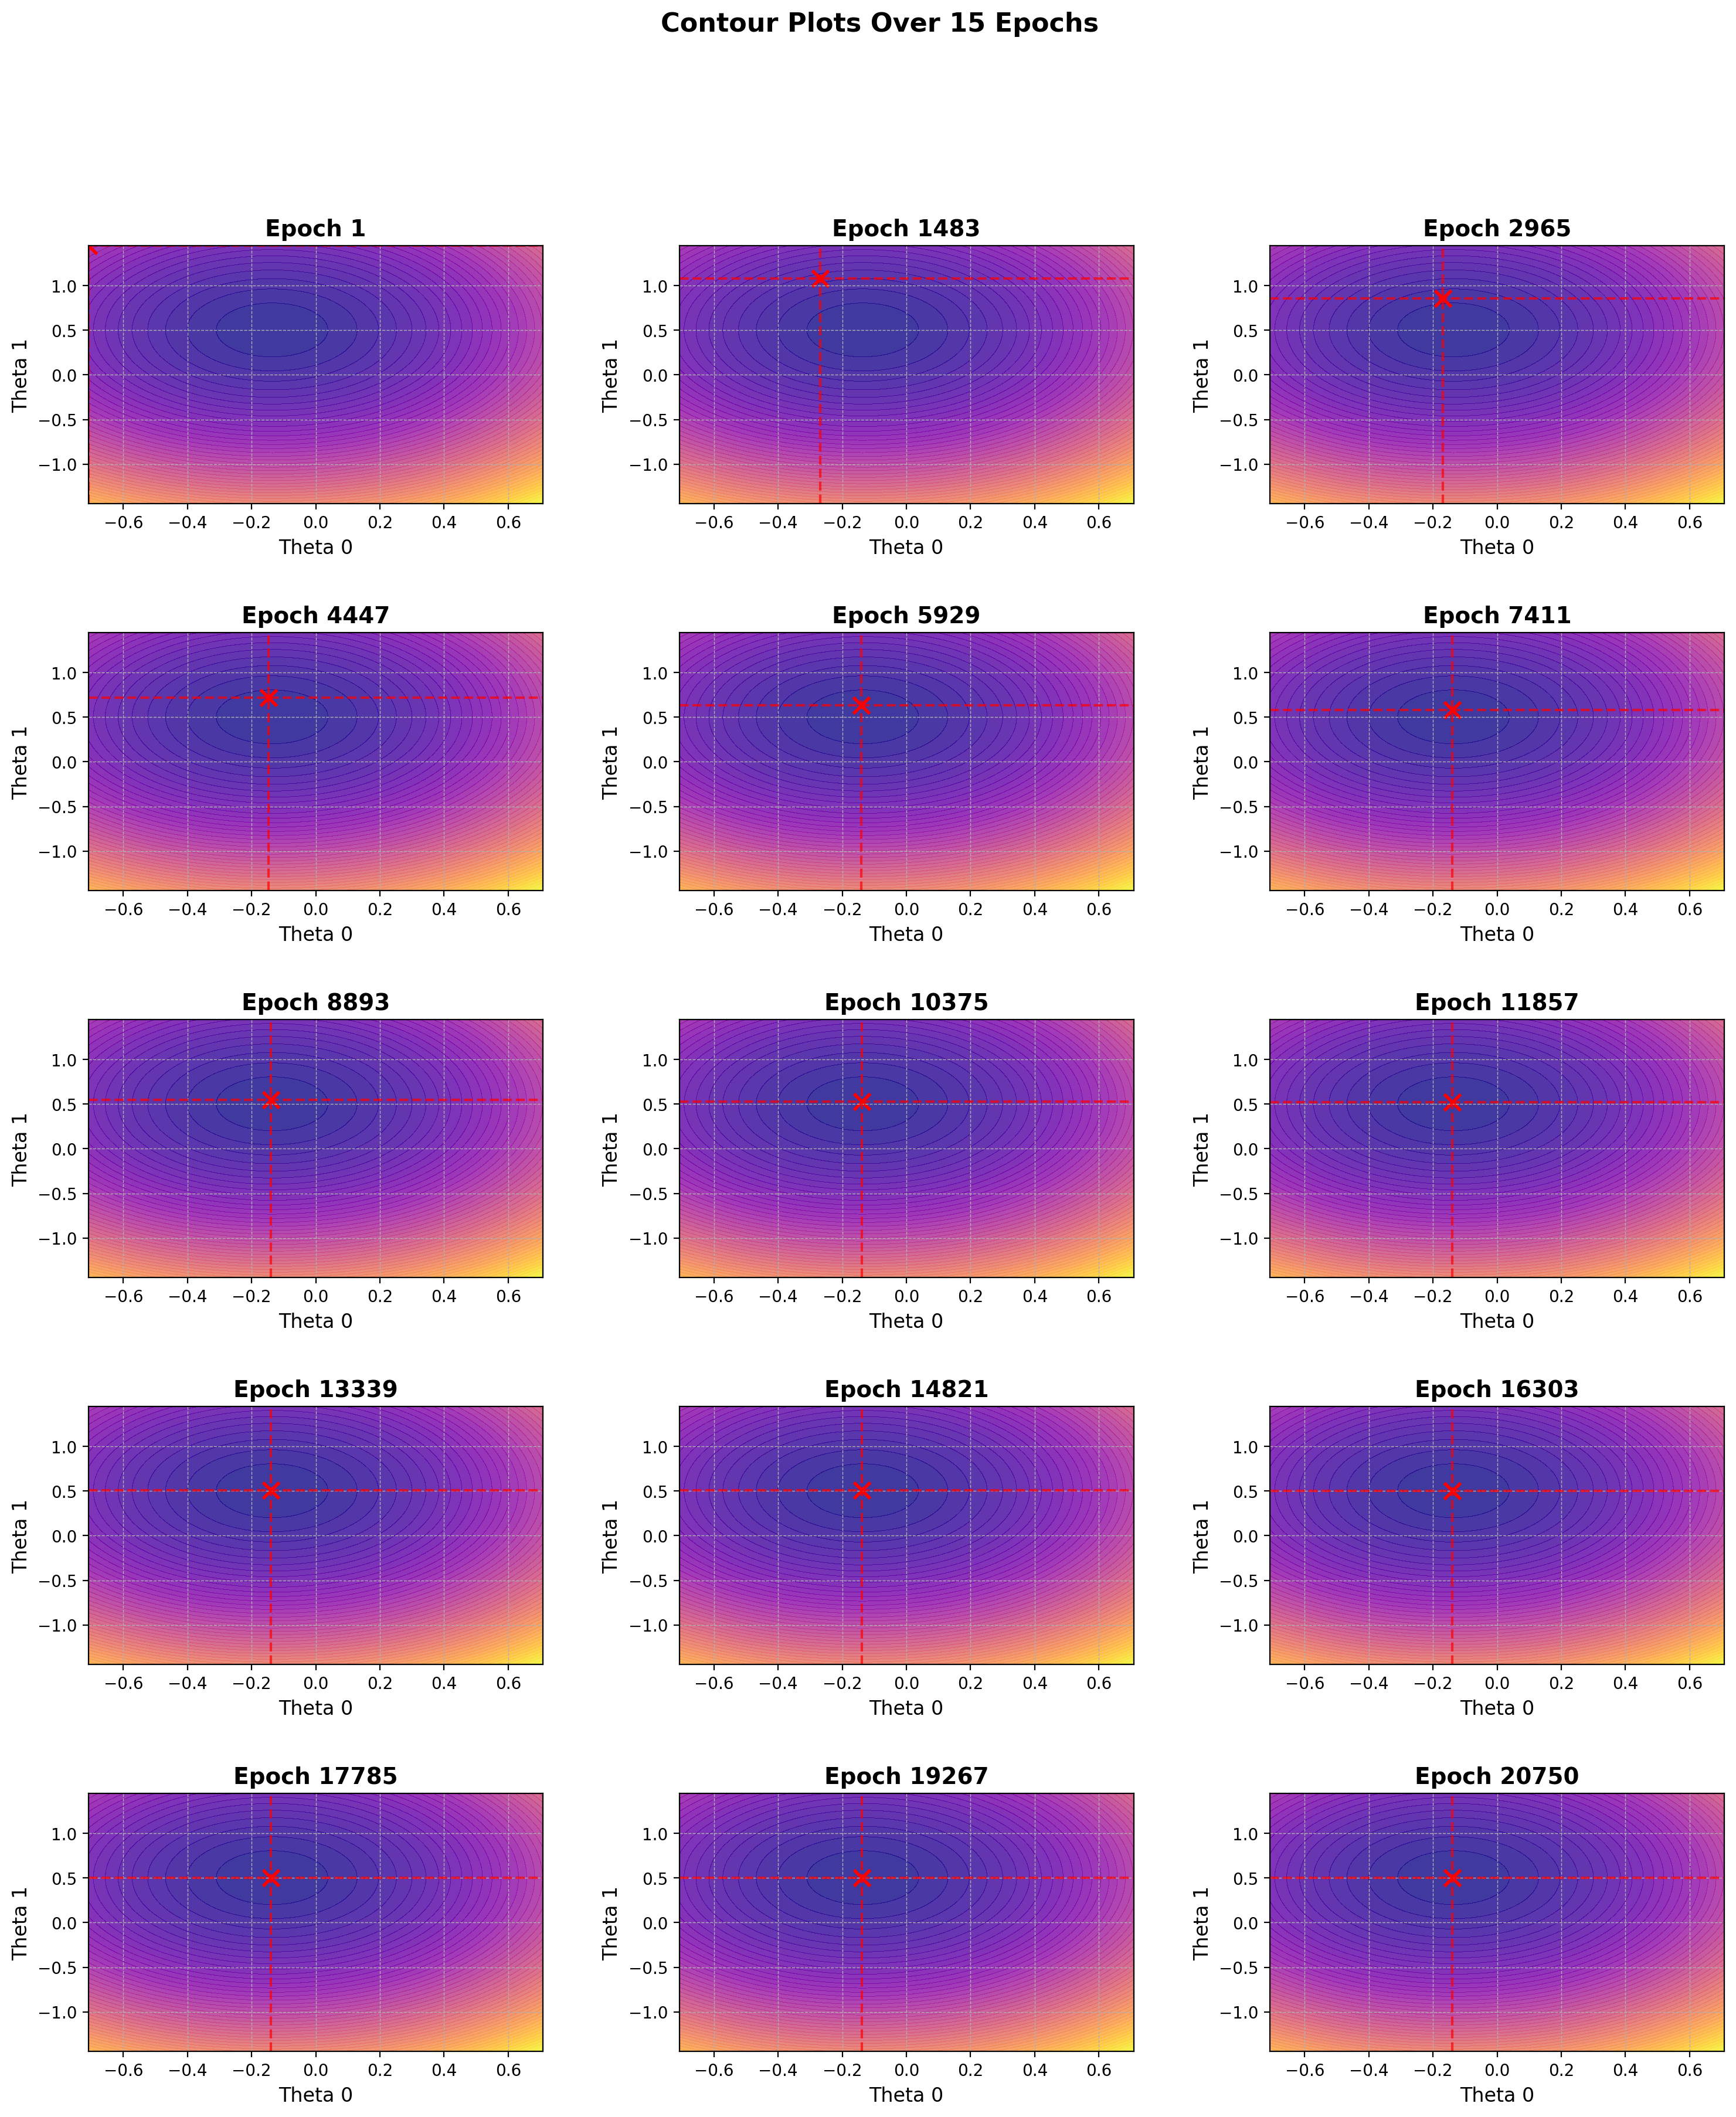

In [21]:
plot_contours(full_grad_thetas,X,y)

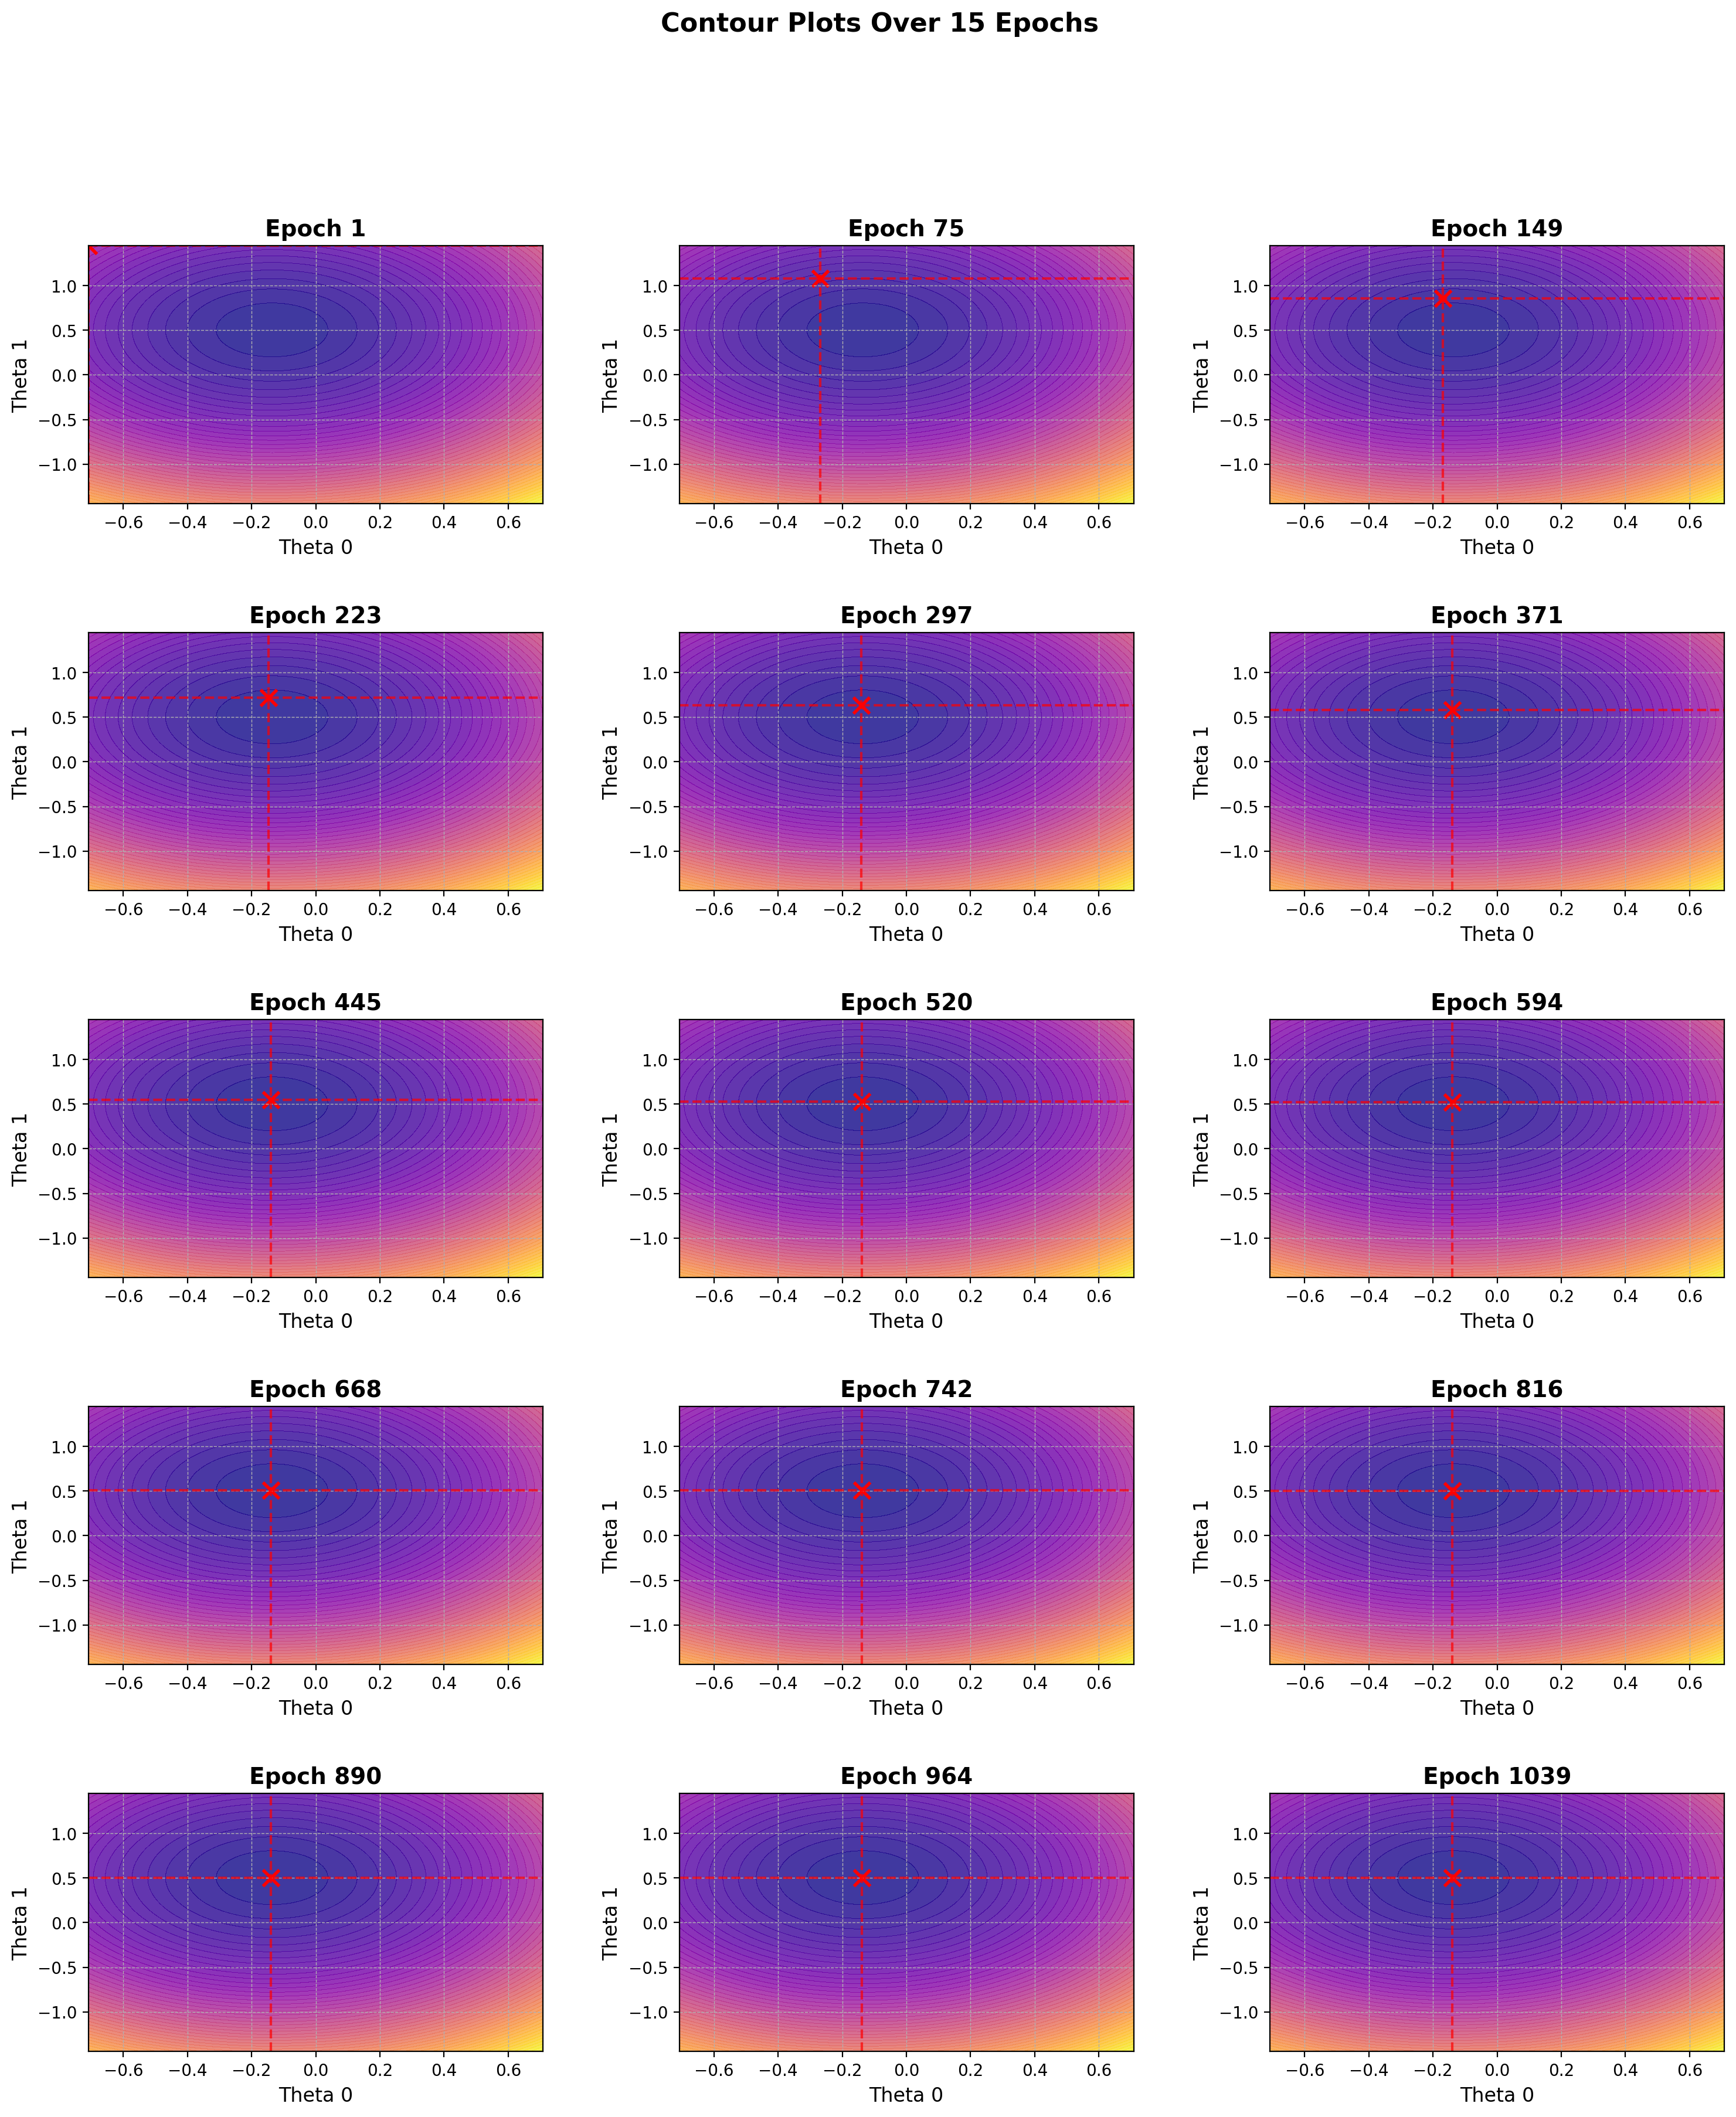

In [22]:
plot_contours(mini_grad_thetas,X,y)

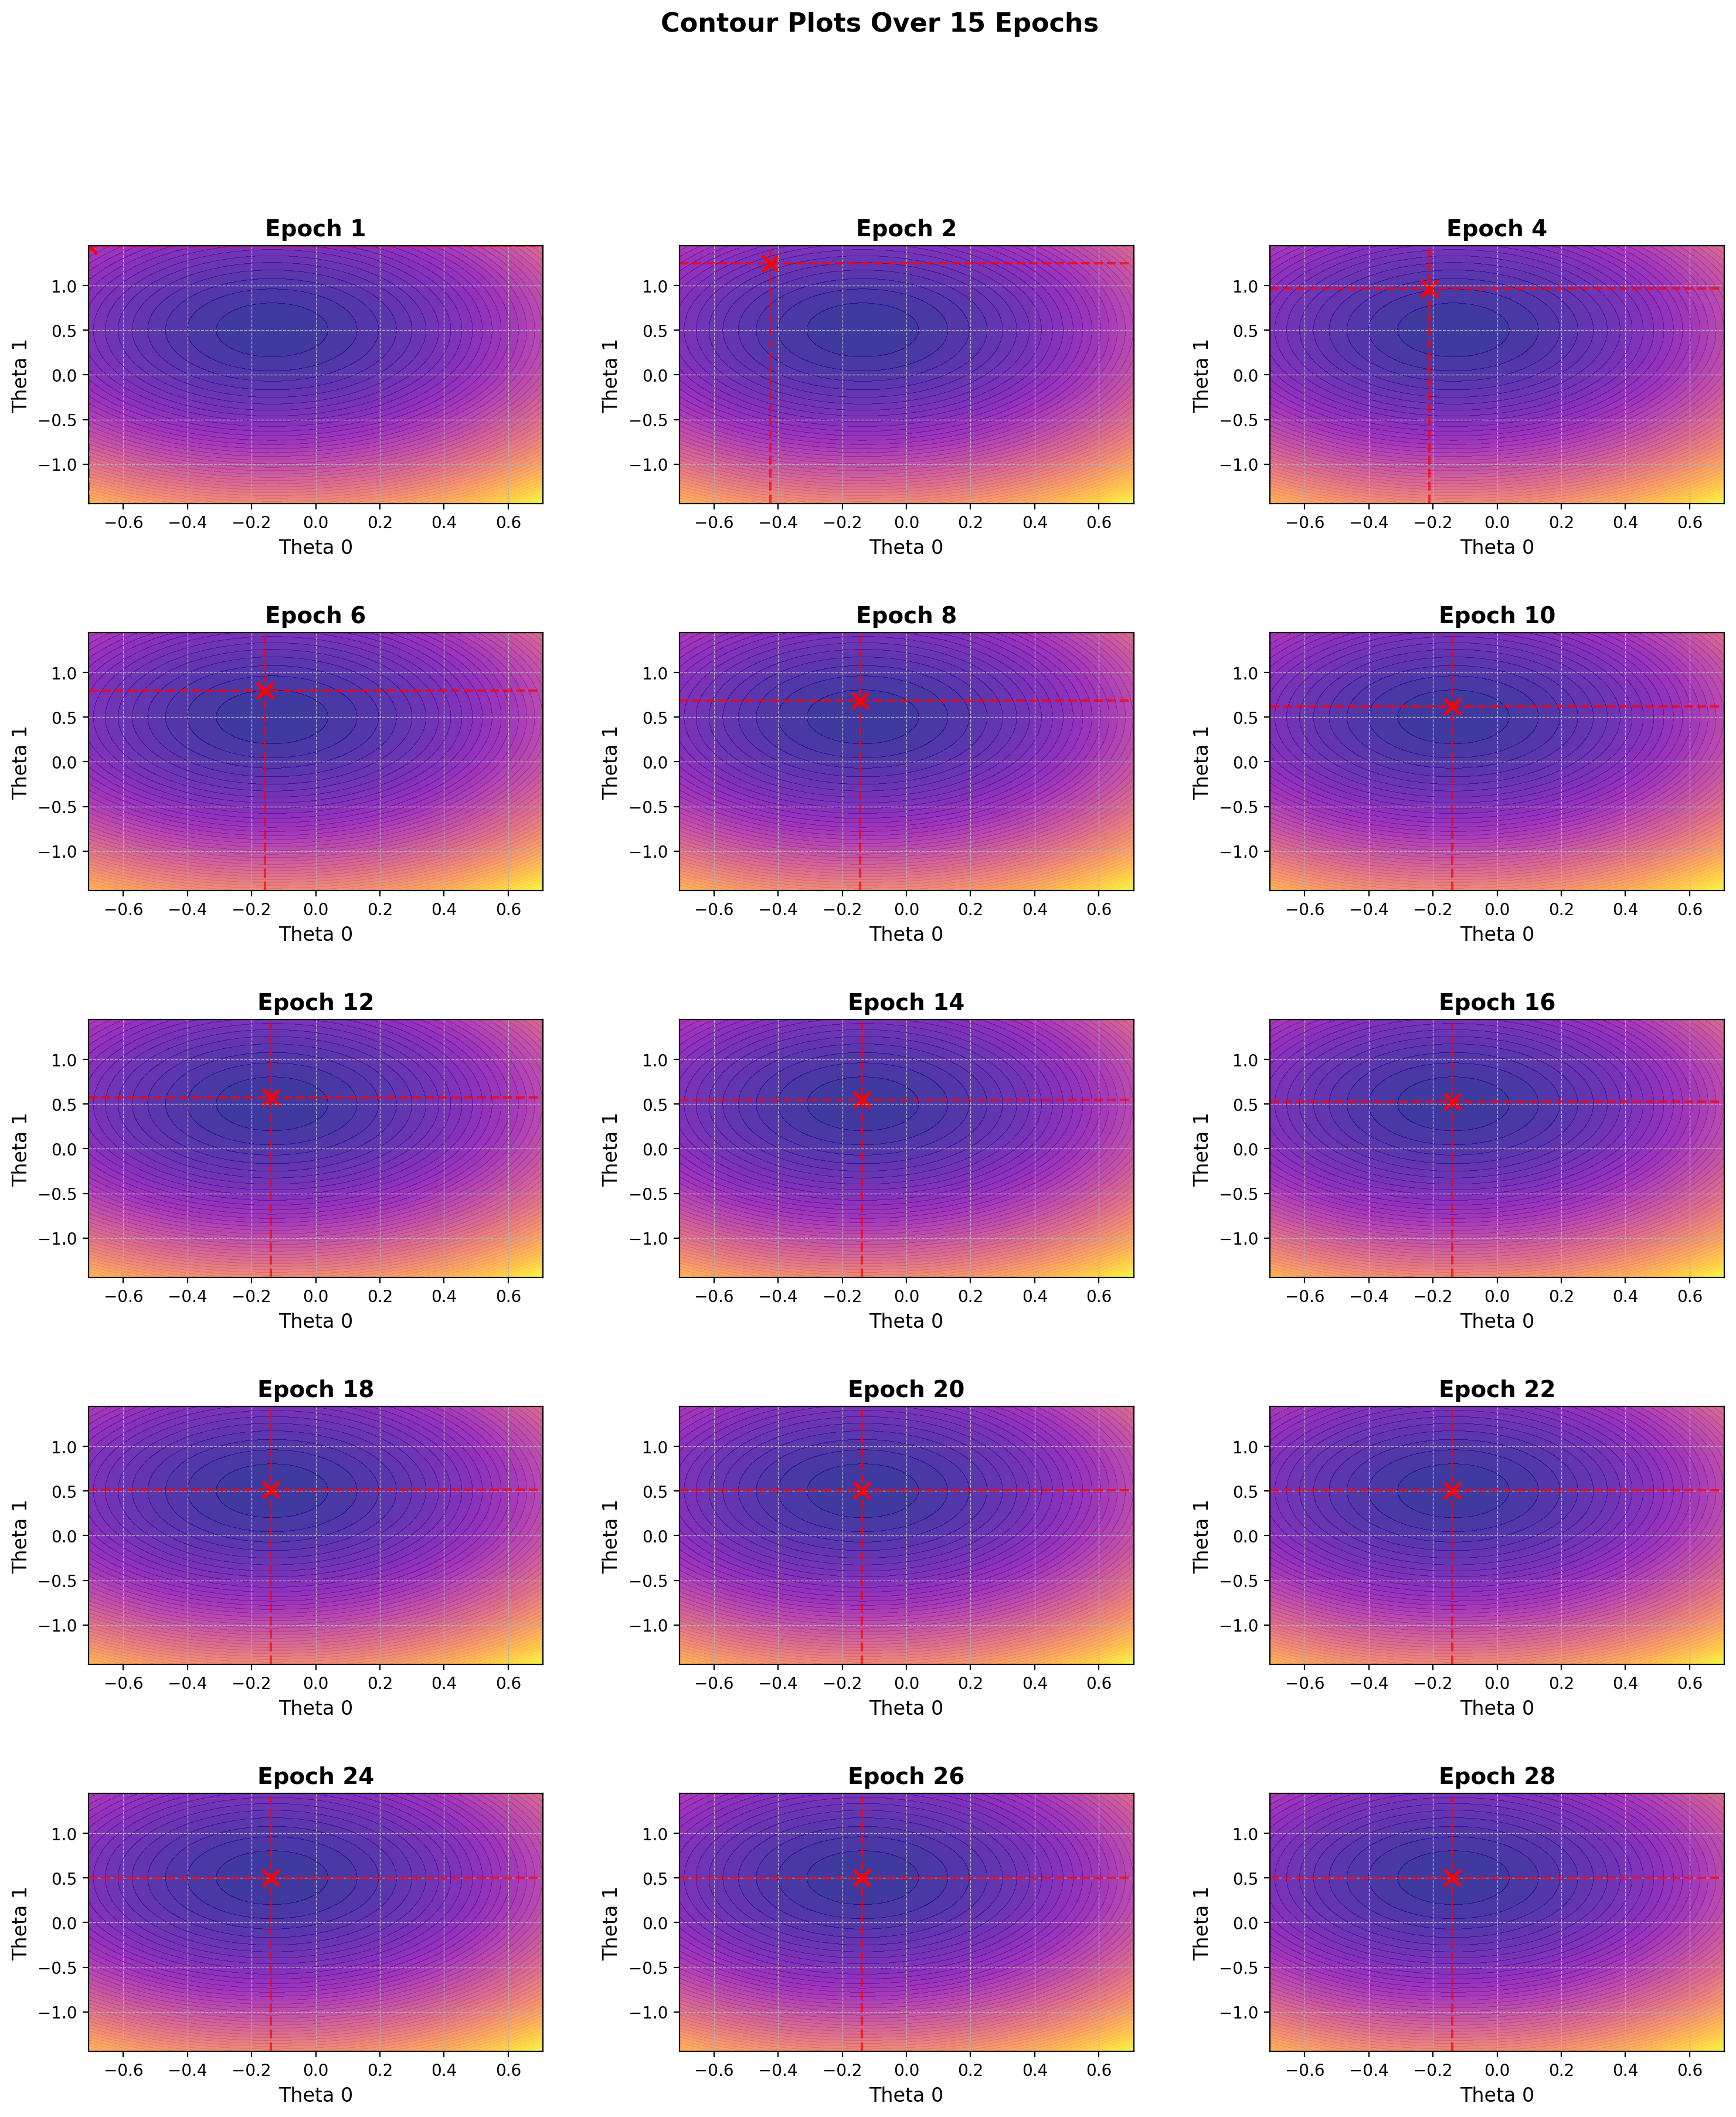

In [23]:
plot_contours(sgd_grad_thetas,X,y)

In [24]:
def plot_loss(loss_histories, labels):
    plt.figure(figsize=(12, 8))
    for loss_history, label in zip(loss_histories, labels):
        plt.plot(np.arange(1, len(loss_history) + 1), loss_history, label=label)
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs. Epochs for Different Gradient Descent Methods')
    plt.grid(True)
    plt.show()

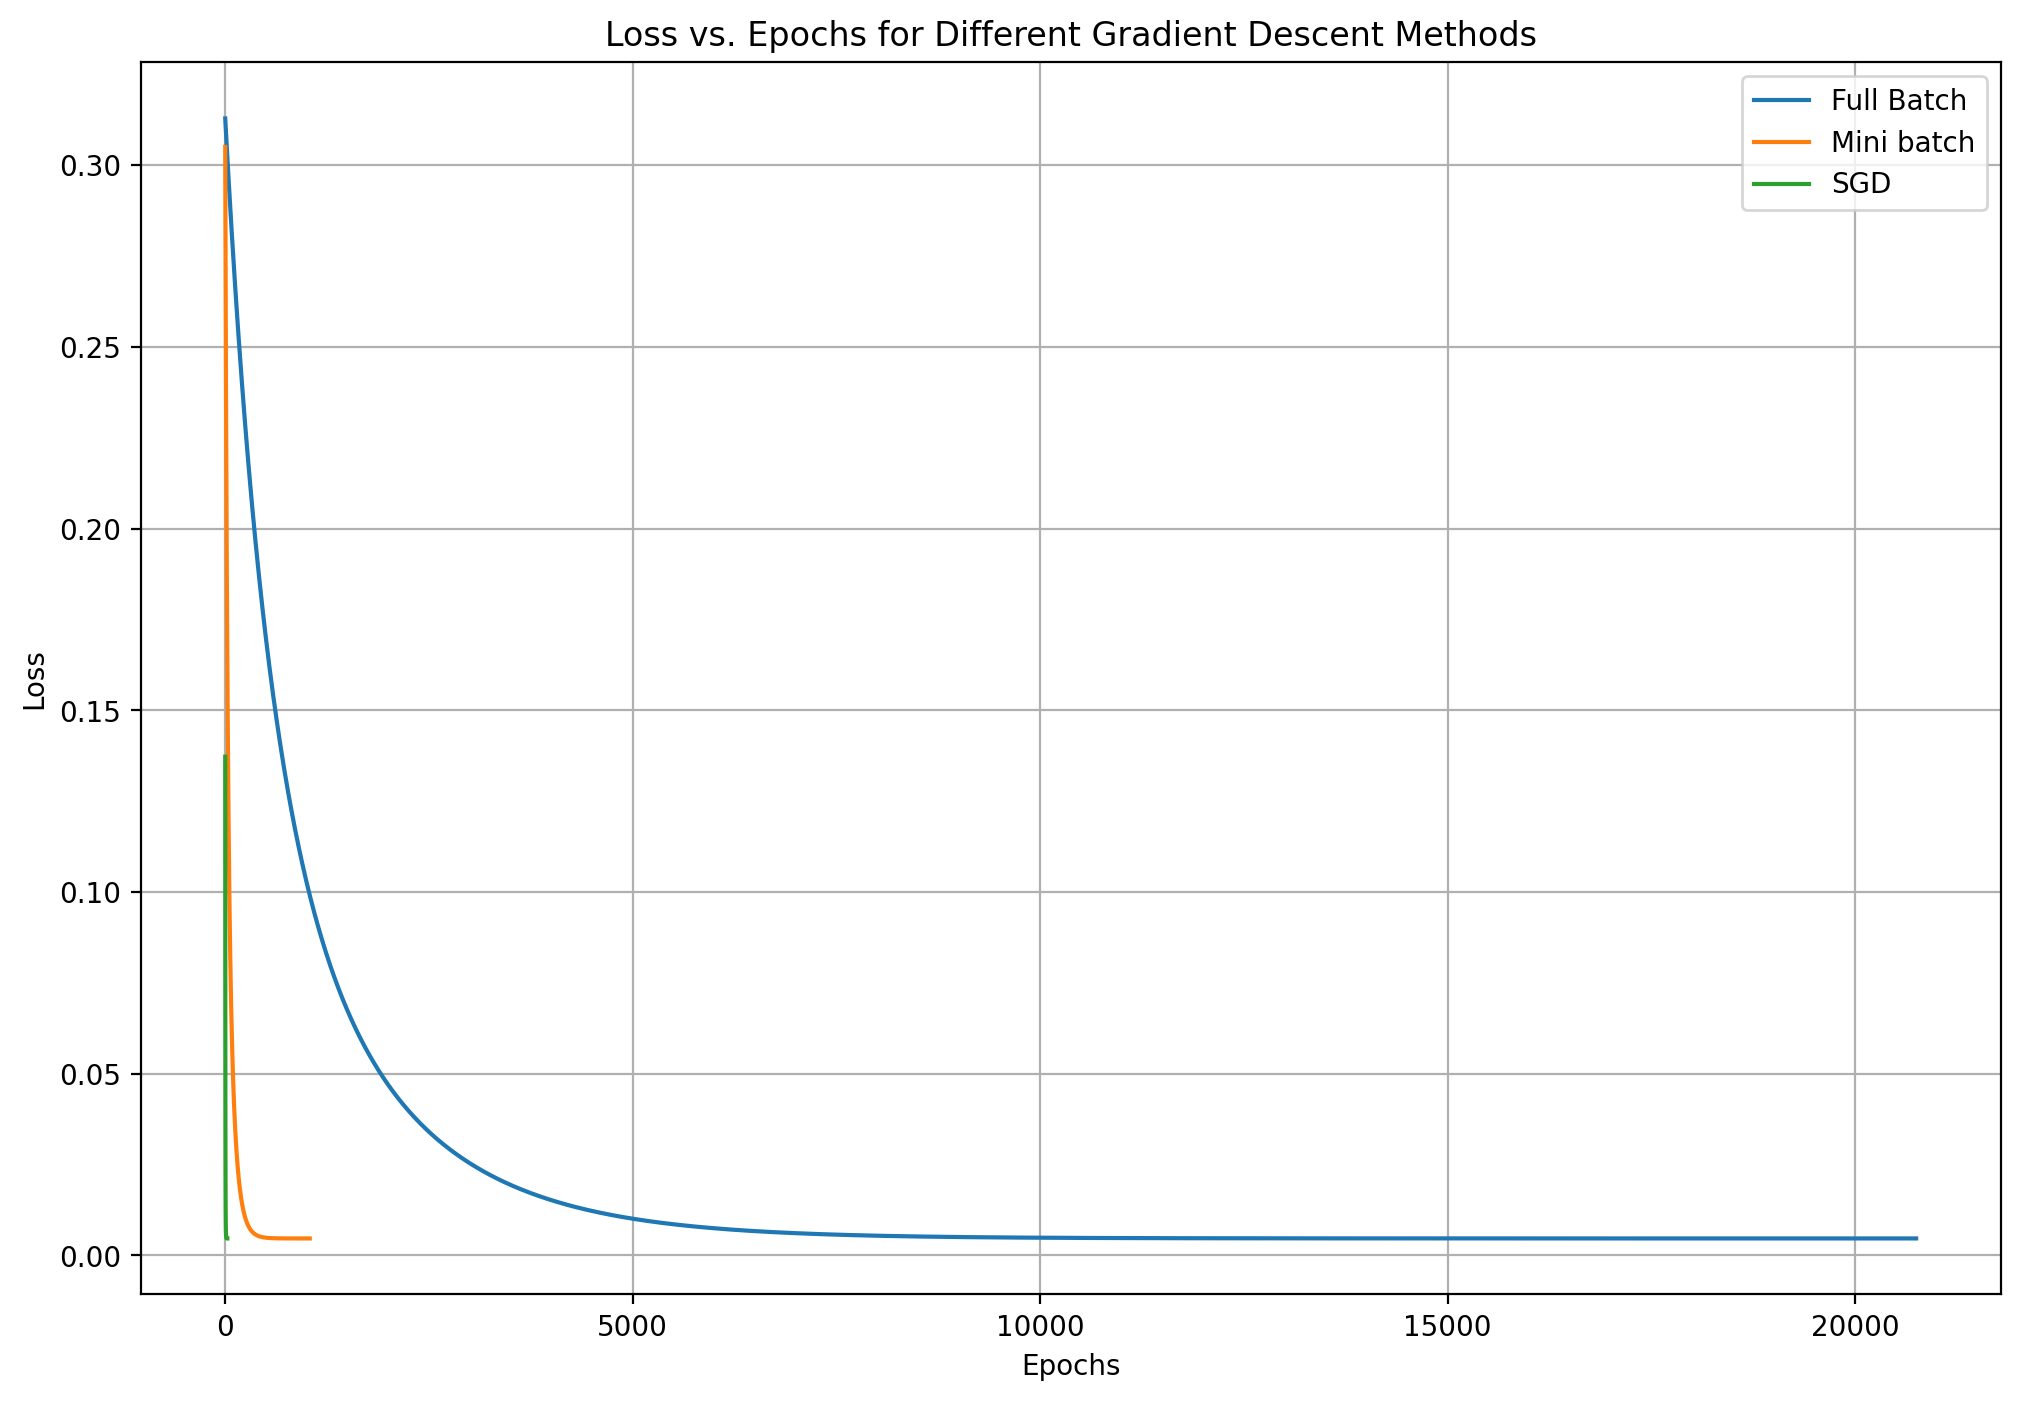

Number of iterations in full batch:	 191450
Number of iterations in mini batch:	 191580
Number of iterations in sgd grad:	 176544


In [28]:
loss_histories = [full_grad_losses,mini_grad_losses,sgd_grad_losses[:len(full_grad_losses)]]
labels = ["Full Batch","Mini batch","SGD"]
plot_loss(loss_histories,labels)


print("Number of iterations in full batch:\t",full_batch_iter)
print("Number of iterations in mini batch:\t",mini_batch_iter)
print("Number of iterations in sgd grad:\t",sgd_iter)

# Que 4


Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighborhood for both dataset. Choose ϵ=0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc. 

In [29]:
def gradient_full_batch_mom(X, y, epochs,theta_ols, alpha=0.001, momentum=0.9, thresh=0.001):
    N = X.shape[1]  # Number of features
    d = X.shape[0]  # Number of samples

    params = []
    grads = []
    moms = []

    theta = np.array([-50.2, -50.494])
    past_grad = np.zeros_like(theta)

    J_theta = float('inf')

    losses = []
    iters = 0

    for epoch in range(1, epochs+1):
        if np.sum((theta - theta_ols)**2) < thresh:
            print("Iterations of Full batch GD: ", iters)
            print("Epochs of Full batch GD: ", epoch)
            return params, losses, iters, grads, moms

        y_pred = X @ theta

        # Compute the gradient
        gradient = (1 / d) * (X.T @ (y_pred - y))
        past_grad = momentum * past_grad + gradient

        # Append theta, gradient, and momentum for visualization
        params.append(theta.copy())
        grads.append(gradient.copy())
        moms.append(past_grad.copy())

        # Update the parameters
        theta -= alpha * past_grad

        # Compute the cost function (J_theta)
        J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

        # Store the loss value
        losses.append(J_theta)

        iters += 1

    print("Iterations of Full batch GD: ", iters)
    print("Epochs of Full batch GD: ", epoch)
    
    return params, losses, iters, grads, moms


In [30]:
def gradient_mini_batch_mom(X, y, num_batch, epochs,theta_ols, alpha=0.001, momentum=0.9, thresh=0.001):
    # N is number of features in X and d is the number of samples
    N = X.shape[1]
    d = X.shape[0]

    params = []
    grads = []
    moms = []
    theta = np.array([-50.2, -50.494])
    past_grad = np.zeros_like(theta)  # Initial momentum (past gradient)

    losses = []
    iters = 0
    J_theta = float('inf')

    for epoch in range(1, epochs + 1):  # Changed to range(1, epochs+1) to include the last epoch
        params.append(theta.copy())  # Append a copy of current theta
        losses.append(J_theta)

        if np.sum((theta - theta_ols)**2) < thresh:  # Stop if cost is below threshold
            print("Iterations of Mini batch GD: ", iters)
            print("Epochs of Mini batch GD: ", epoch)
            return params, losses, iters, grads, moms  # Return also grads and moms

        batches = create_batches(X, y, num_batch)
        for batch in batches: 
            iters += 1
            x_b = batch[0]
            y_b = batch[1]

            # Calculate predictions for mini-batch
            y_hat_b = x_b @ theta

            # Calculate gradient for the mini-batch
            gradient = (1 / x_b.shape[0]) * (x_b.T @ (y_hat_b - y_b))

            # Update past gradient (momentum term)
            past_grad = momentum * past_grad + gradient

            # Update parameters
            theta -= alpha * past_grad

            # Save the current gradient and momentum for visualization
            grads.append(gradient.copy())
            moms.append(past_grad.copy())

        # Compute cost for the entire dataset at the end of the epoch
        J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    print("Iterations of Mini batch GD: ", iters)
    print("Epochs of Mini batch GD: ", epoch)

    return params, losses, iters, grads, moms  # Return params, losses, iters, grads, moms


In [31]:
def gradient_SGD_mom(X, y, epochs,theta_ols,alpha=0.001, momentum=0.9, thresh=0.001):
    N = X.shape[1]  # Number of features
    d = X.shape[0]  # Number of samples

    params = []
    grads = []
    moms = []
    theta = np.array([-50.2, -50.494])
    past_grad = np.zeros_like(theta)  # Initial momentum (past gradient)

    losses = []
    iters = 0
    J_theta = float('inf')

    for epoch in range(1, epochs + 1):
        params.append(theta.copy())  # Append a copy of the current theta
        losses.append(J_theta)

        for i in range(d):  # Loop over each sample (Stochastic)
            if np.sum((theta - theta_ols)**2) < thresh:
                print("Iterations of SGD: ", iters)
                print("Epochs of SGD: ", epoch)
                return params, losses, iters, grads, moms

            iters+=1

            # Take one sample at a time (SGD)
            x_i = X[i:i+1]
            y_i = y[i:i+1]

            # Prediction for one sample
            y_hat_i = x_i @ theta

            # Gradient for one sample
            gradient = (x_i.T @ (y_hat_i - y_i))

            # Update past gradient (momentum term)
            past_grad = momentum * past_grad + gradient

            # Update parameters
            theta -= alpha * past_grad

            # Save the current gradient and momentum for visualization
            grads.append(gradient.copy())
            moms.append(past_grad.copy())

        # Compute cost for the entire dataset at the end of the epoch
        J_theta = (1 / (2 * d)) * np.sum((X @ theta - y) ** 2)

    print("Iterations of SGD: ", iters)
    print("Epochs of SGD: ", epoch)

    return params, losses, iters, grads, moms  # Return gradients and momentum as well


In [41]:
# prepare the data using make data function
X, y = make_data(noise=0.1 , degree=1, num_samples=1000, random_state=42)

# Concatenate the rows of ones to the data
X = np.concatenate([np.ones((X.shape[0],1)),X],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
def plot_contours_with_vectors(thetas_arr, grads_arr, mom_arr, X, y, limit=None):
    thetas_arr = np.array(thetas_arr)
    grads_arr = np.array(grads_arr)
    mom_arr = np.array(mom_arr)

    theta0_min, theta0_max = -1 * np.max(np.abs(thetas_arr[:, 0])), np.max(np.abs(thetas_arr[:, 0]))
    theta1_min, theta1_max = -1 * np.max(np.abs(thetas_arr[:, 1])), np.max(np.abs(thetas_arr[:, 1]))

    theta0_vals = np.linspace(theta0_min, theta0_max, 100)
    theta1_vals = np.linspace(theta1_min, theta1_max, 100)

    total_plots = 15
    indices = np.linspace(0, len(thetas_arr) - 1, total_plots, dtype=int)

    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    J_vals_all = np.zeros((len(theta0_vals), len(theta1_vals)))
    for i, theta0 in enumerate(theta0_vals):
        for k, theta1 in enumerate(theta1_vals):
            t = np.array([theta0, theta1])
            J_vals_all[i, k] = compute_cost(X, y, t)

    J_vals_all = J_vals_all.T
    vmin, vmax = np.min(J_vals_all), np.max(J_vals_all)

    for idx, j in enumerate(indices):
        theta = thetas_arr[j]
        gradient = grads_arr[j]
        momentum = mom_arr[j]

        J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
        for i, theta0 in enumerate(theta0_vals):
            for k, theta1 in enumerate(theta1_vals):
                t = np.array([theta0, theta1])
                J_vals[i, k] = compute_cost(X, y, t)

        J_vals = J_vals.T

        ax = axes[idx // 3, idx % 3]
        contour = ax.contourf(theta0_vals, theta1_vals, J_vals, levels=50, cmap='plasma', alpha=0.8, vmin=vmin, vmax=vmax)
        ax.scatter(theta[0], theta[1], color='red', marker='x', s=100, linewidth=2)

        # Add text annotations for gradient and momentum vectors
        ax.text(theta[0], theta[1] + 2, f'Grad: ({gradient[0]:.2f}, {gradient[1]:.2f})', color='lightgreen', alpha=0.9, fontsize=9)
        ax.text(theta[0], theta[1] - 2, f'Mom: ({momentum[0]:.2f}, {momentum[1]:.2f})', color='yellow', alpha=0.9, fontsize=9)

        ax.axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
        ax.axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)        
        ax.set_title(f'Epoch {j + 1}\n Theta [{theta[0]:.2f}, {theta[1]:.2f}]', fontsize=14, fontweight='bold')
        ax.set_xlabel('Theta 0', fontsize=12)
        ax.set_ylabel('Theta 1', fontsize=12)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    fig.suptitle('Contour Plots with Gradient and Momentum Values Over 15 Epochs', fontsize=16, fontweight='bold')
    plt.show()



In [43]:
epochs = 50000
epsilon = 0.001

num_batch = 10

theta_ols = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

theta = np.array([-50.2, -50.494])

full_grad_thetas,full_grad_losses,full_grad_iters,full_grad_epochs = gradient_full_batch(X_train,y_train,epochs,np.copy(theta),theta_ols,alpha=0.001,thresh=epsilon)
print("Iterations of Full Batch GD: ", full_grad_iters)
print("Epochs of Full Batch GD ", full_grad_epochs)
print("-----------------------------------")
mini_grad_thetas,mini_grad_losses,mini_grad_iters,mini_grad_epochs = gradient_mini_batch(X_train,y_train,num_batch,epochs,np.copy(theta),theta_ols,alpha=0.001,thresh=epsilon)
print("Iterations of Mini Batch GD: ", mini_grad_iters)
print("Epochs of Mini Batch GD ", mini_grad_epochs)
print("-----------------------------------")
sgd_grad_thetas,sgd_grad_losses,sgd_grad_iters,sgd_grad_epochs = gradient_SGD(X_train,y_train,epochs,np.copy(theta),theta_ols,alpha=0.001,thresh=epsilon)
print("Iterations of SGD: ", sgd_grad_iters)
print("Epochs of SGD ", sgd_grad_epochs)
print("-----------------------------------")

print("\nUsing Momentum\n")

# Run Full Batch Gradient Descent with Momentum
full_grad_thetas_mom, full_grad_losses_mom, full_grad_iters_mom, full_grad_grads_mom, full_grad_moms_mom = gradient_full_batch_mom(
    X_train, y_train, epochs,theta_ols, alpha=0.001, momentum=0.9, thresh=epsilon)
print("-----------------------------------")

# Run Mini-Batch Gradient Descent with Momentum
mini_grad_thetas_mom, mini_grad_losses_mom, mini_grad_iters_mom,  mini_grad_grads_mom, mini_grad_moms_mom = gradient_mini_batch_mom(
    X_train, y_train, num_batch, epochs,theta_ols, alpha=0.001, momentum=0.9, thresh=epsilon)
print("-----------------------------------")

# Run Stochastic Gradient Descent (SGD) with Momentum
sgd_grad_thetas_mom, sgd_grad_losses_mom, sgd_grad_iters_mom, sgd_grads_mom, sgd_moms_mom = gradient_SGD_mom(
    X_train, y_train, epochs,theta_ols, alpha=0.001, momentum=0.9, thresh=epsilon)
print("-----------------------------------")


Iterations of Full Batch GD:  32826
Epochs of Full Batch GD  32827
-----------------------------------
Iterations of Mini Batch GD:  32830
Epochs of Mini Batch GD  3284
-----------------------------------
Iterations of SGD:  31145
Epochs of SGD  45
-----------------------------------

Using Momentum

Iterations of Full batch GD:  2174
Epochs of Full batch GD:  2175
-----------------------------------
Iterations of Mini batch GD:  2180
Epochs of Mini batch GD:  219
-----------------------------------
Iterations of SGD:  2249
Epochs of SGD:  4
-----------------------------------


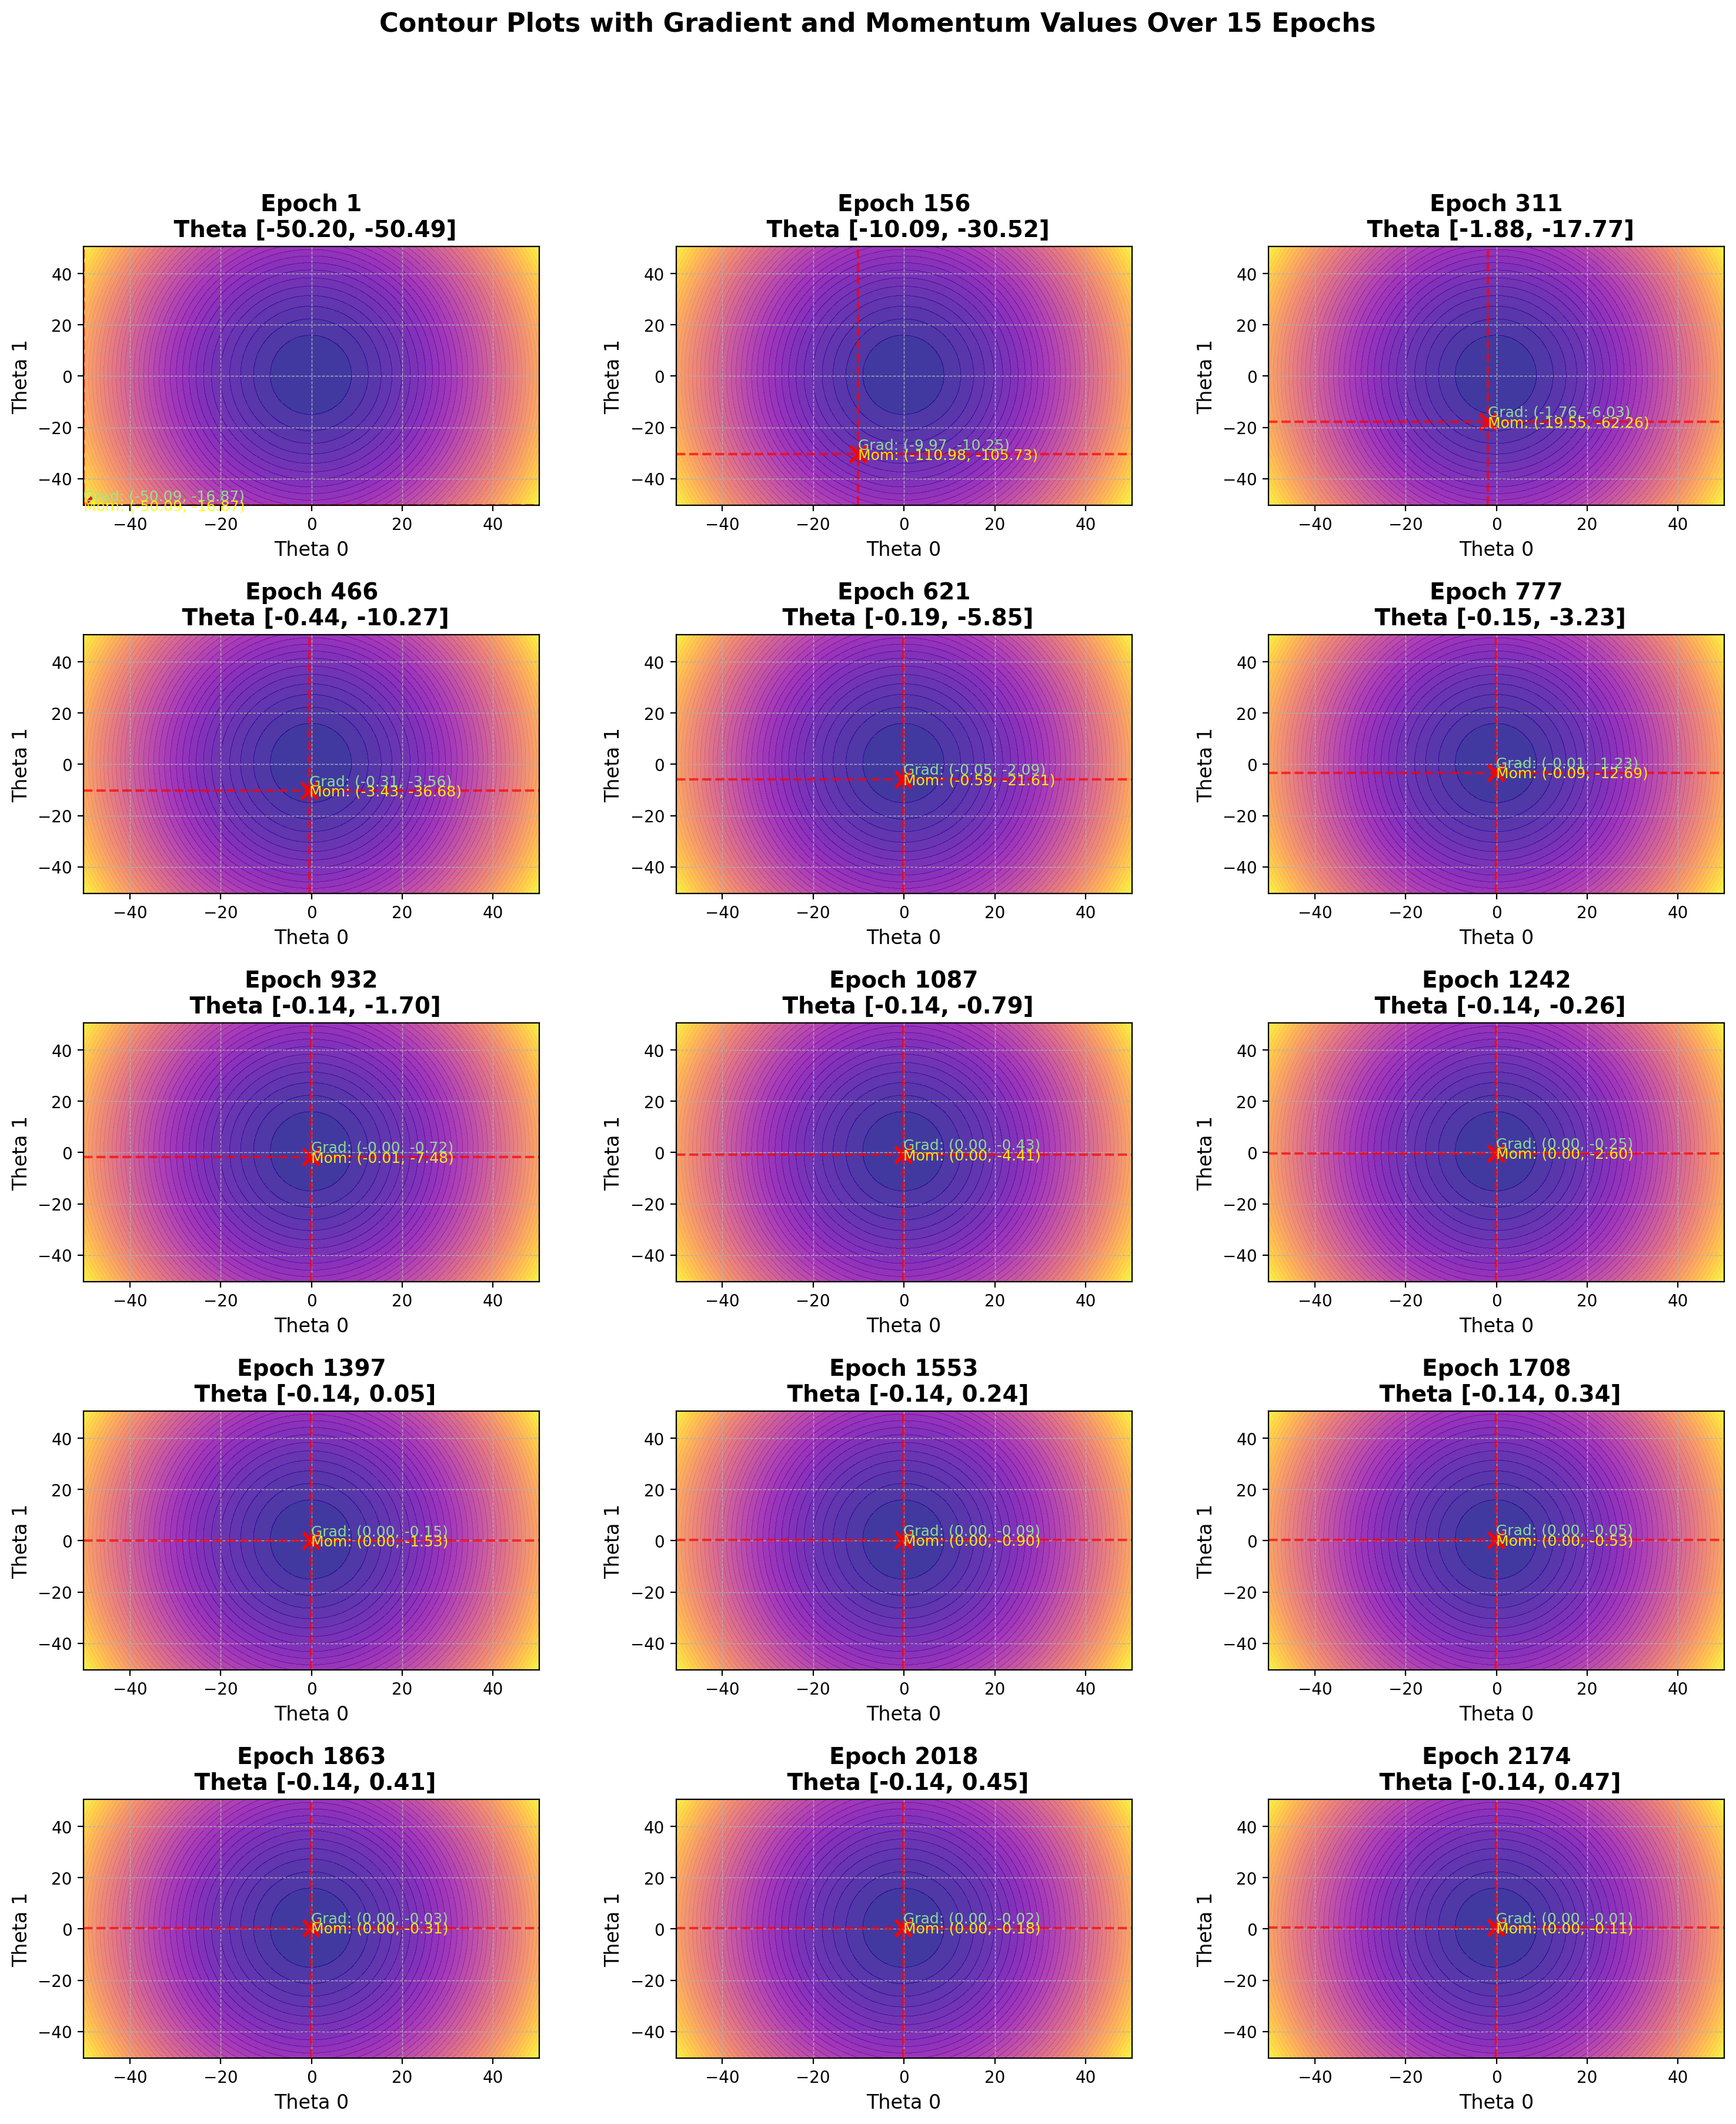

In [44]:
plot_contours_with_vectors(full_grad_thetas_mom, full_grad_grads_mom, full_grad_moms_mom, X, y)


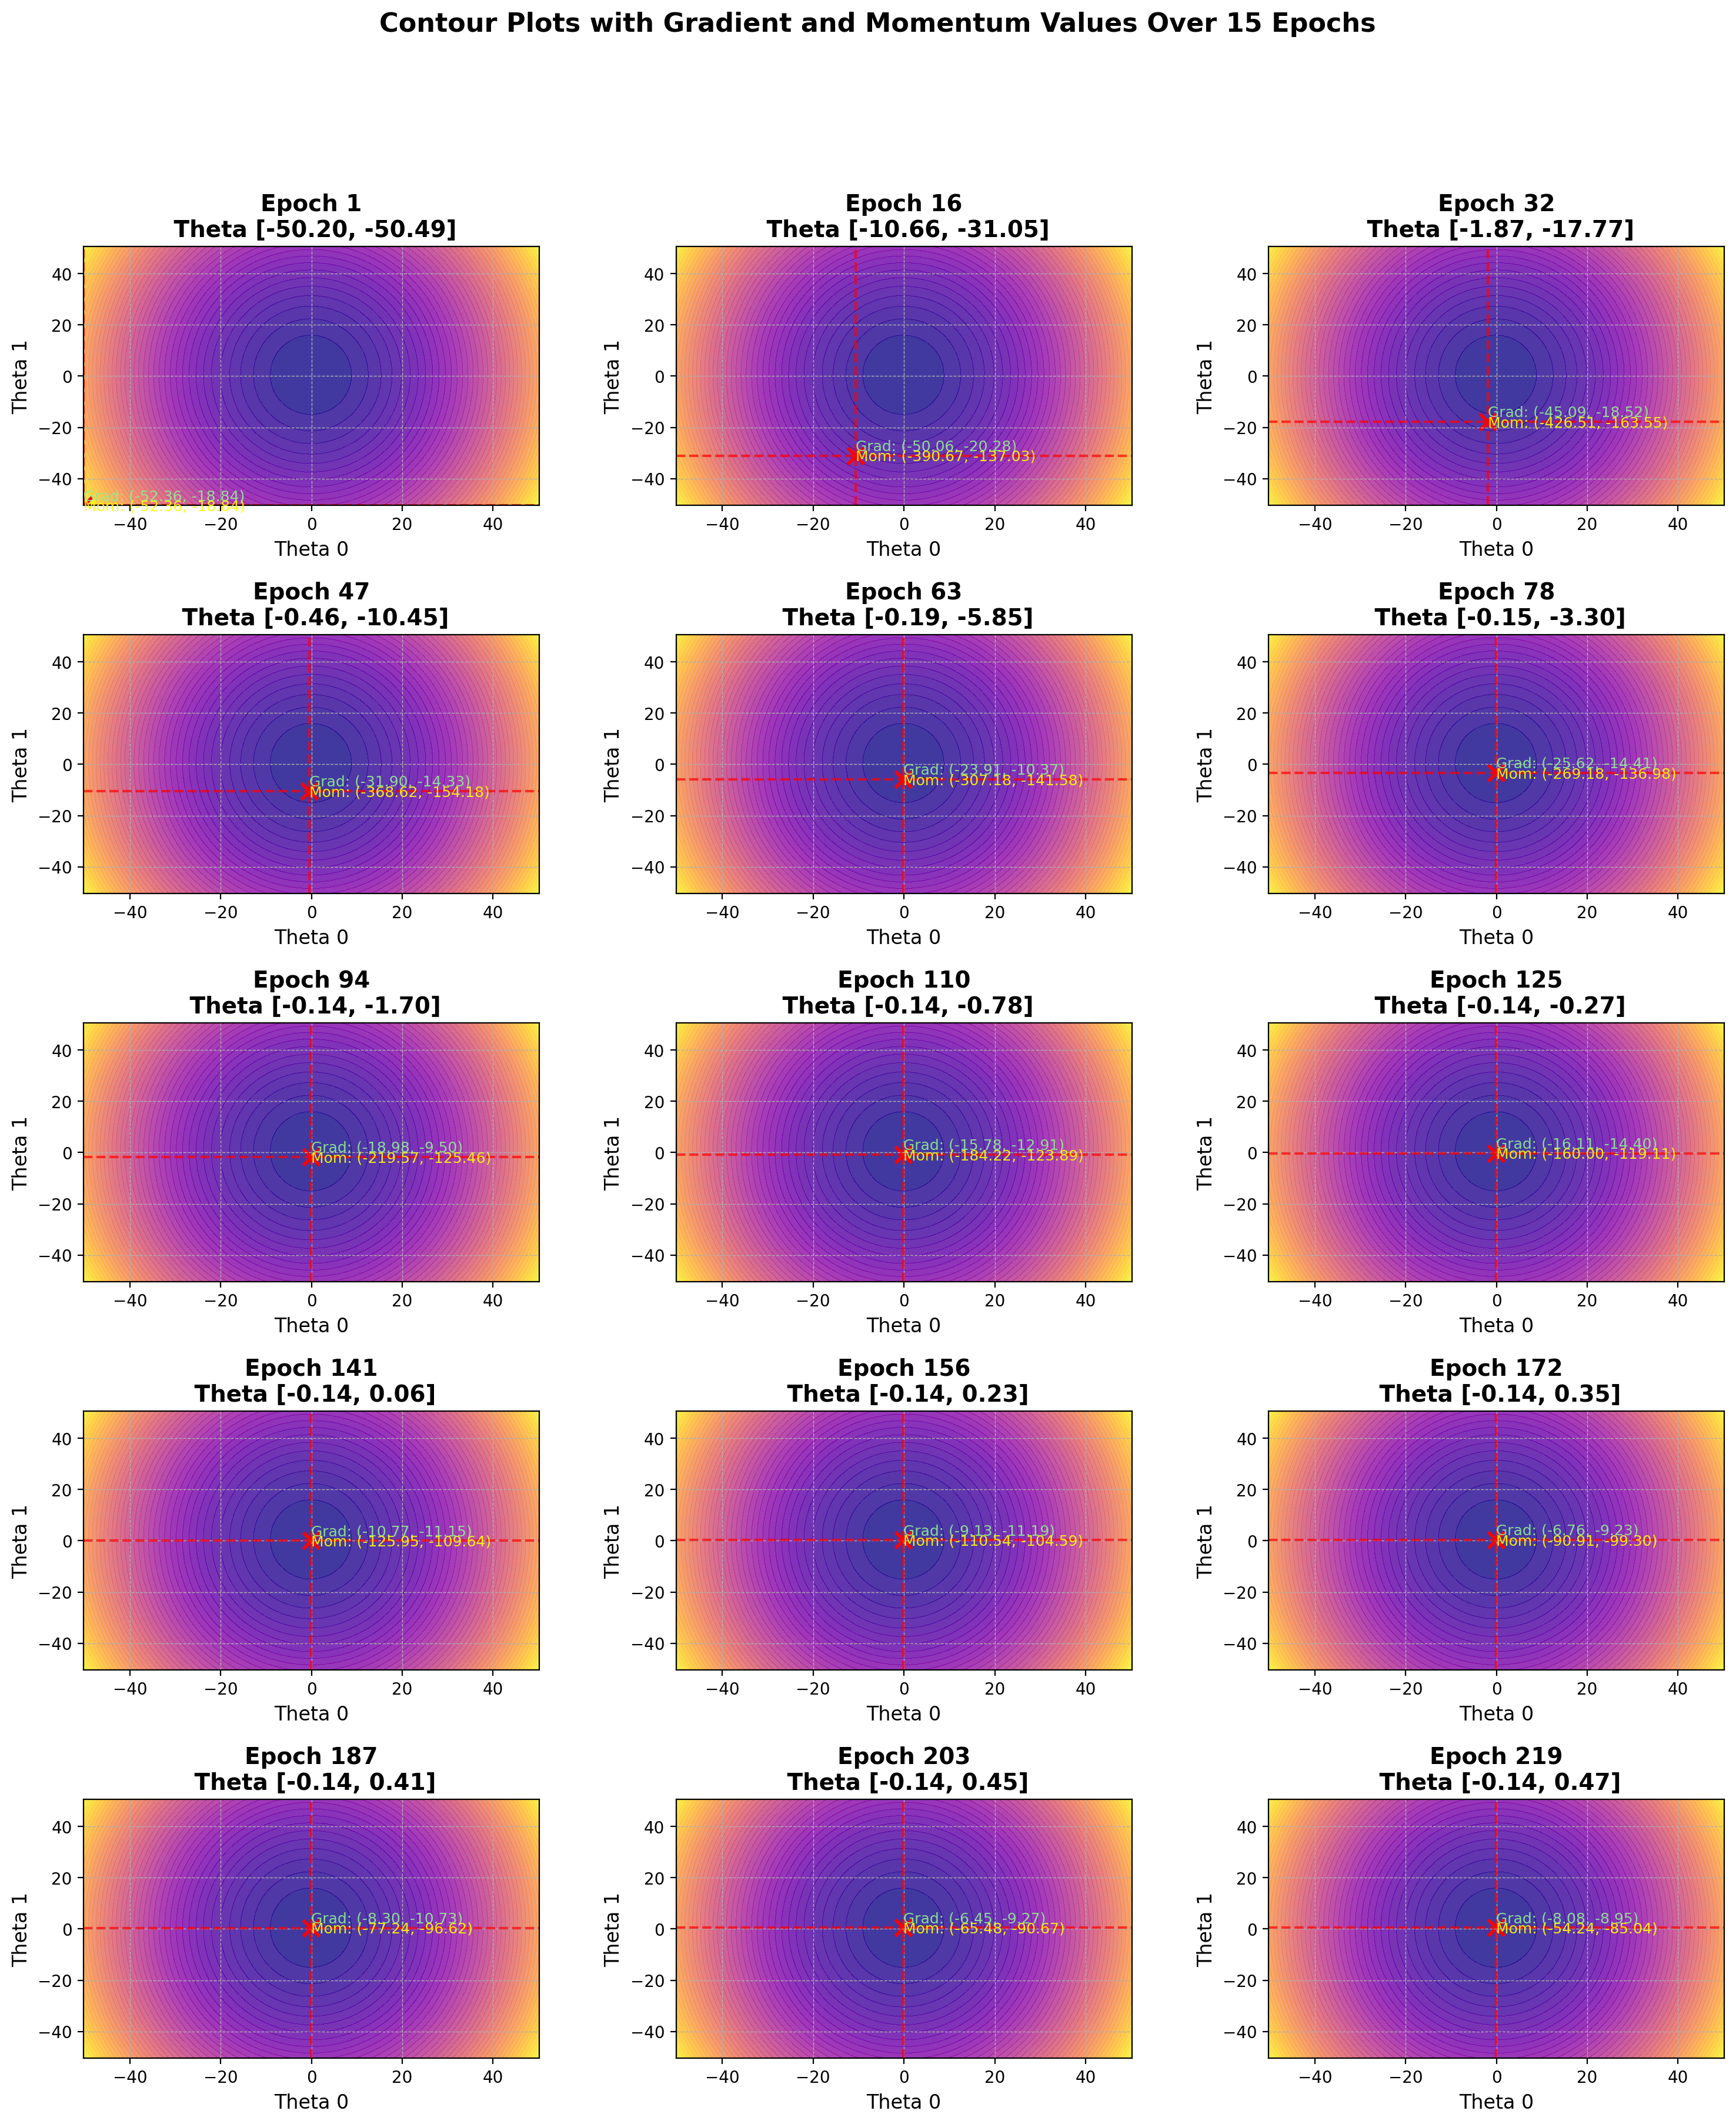

In [45]:
plot_contours_with_vectors(mini_grad_thetas_mom, mini_grad_grads_mom, mini_grad_moms_mom, X, y)

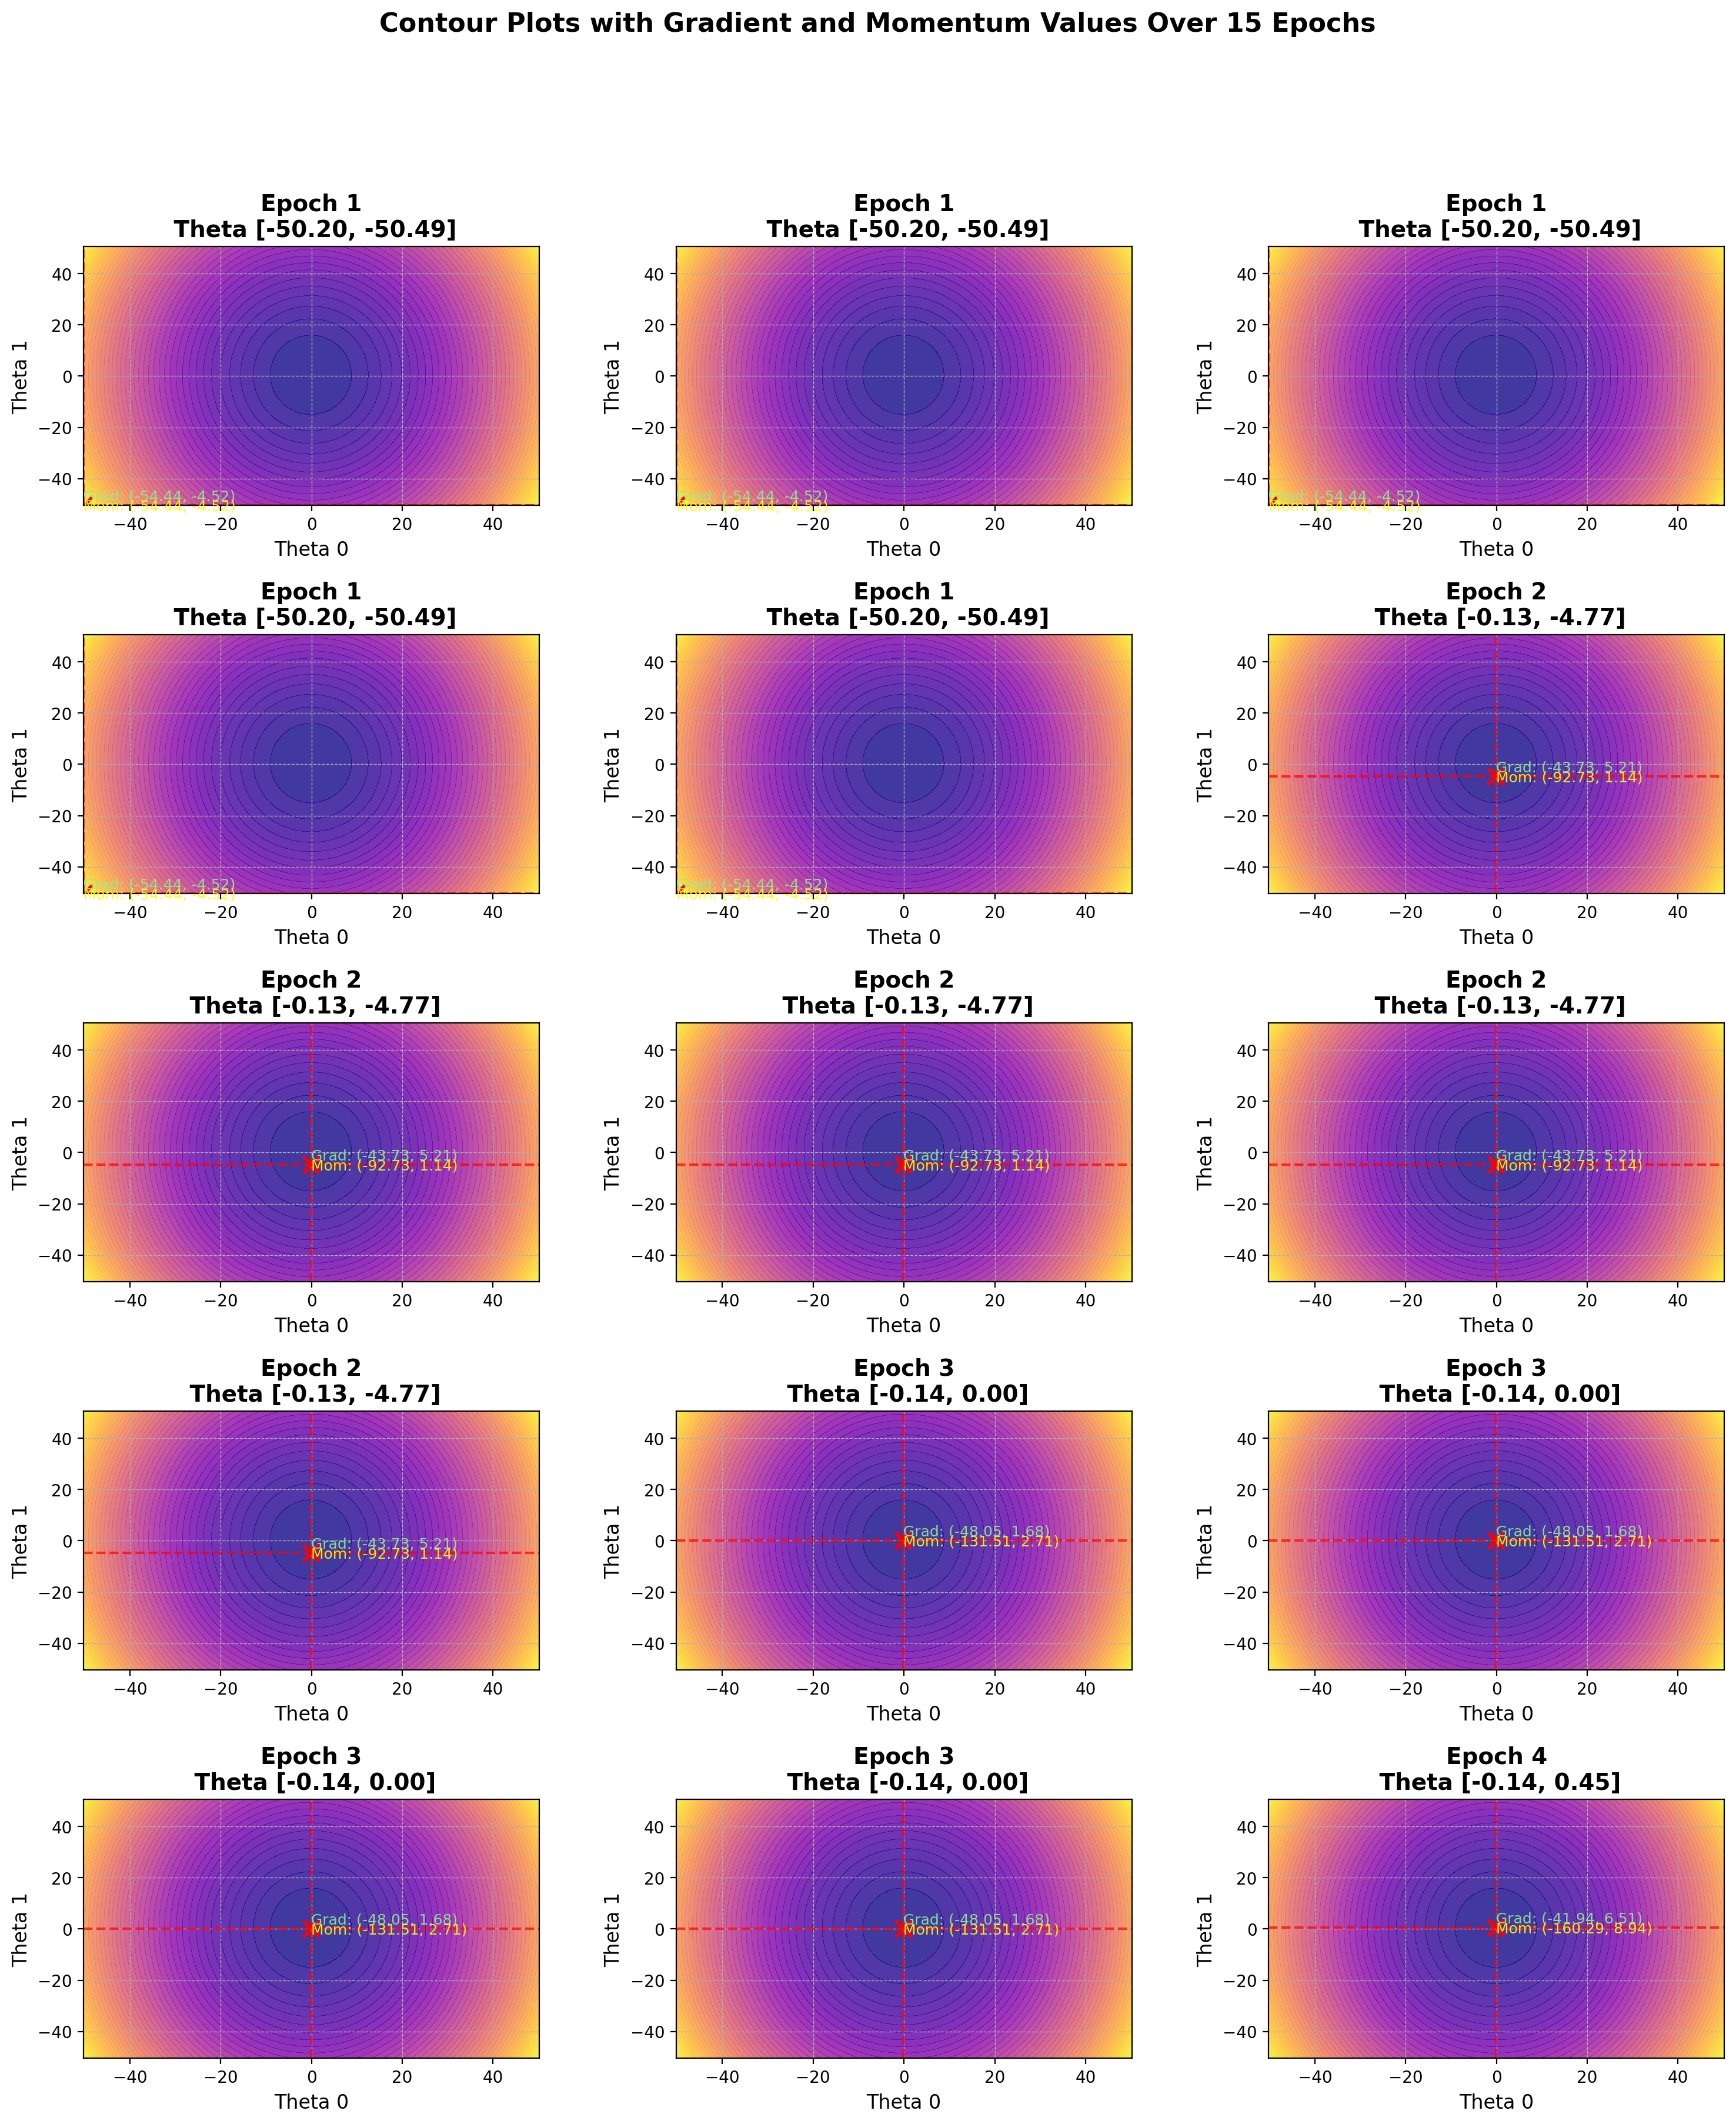

In [46]:
plot_contours_with_vectors(sgd_grad_thetas_mom, sgd_grads_mom, sgd_moms_mom, X, y)